### Data Wrangling Project

Writing Python 3 code to analyze the dataset,find and fix the problems in the data. 
Exploring and understanding the data is one of the most important parts in the data wrangling process. In this dataset we are performing both graphical and non-graphical EDA methods to understand the data first and then find the data problems. 

The dataset is about delivering packages using drones in Victoria, Australia. (HYPOTHETICAL DATA)

Name: <b>Roshan Wahane</b>

Date: 18/08/2018

Environment: Python 3.6.5 and Jupyter notebook Libraries used:

- pandas
- numpy
- matplotlib
- math
- itertools
- collections
- statistics
- sklearn
- matplotlib

## Data Cleansing

Steps taken to achieve the above requirements: -
- Started with manually scanning the data and made observations
- Noted down obvious irreregularities
- Wrote python code to test these noticed irreregularities
- Once hypothesis was correct, started fixing the anomolies

## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Load the data

In [2]:
drone = '29378966.csv'

In [3]:
df = pd.read_csv(drone)

#### Make observations

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36943 entries, 0 to 36942
Data columns (total 16 columns):
Id                       36916 non-null object
Drone Type               36933 non-null float64
Post Type                36923 non-null float64
Package Weight           36943 non-null float64
Origin Region            36933 non-null float64
Destination Region       36933 non-null float64
Origin Latitude          36943 non-null float64
Origin Longitude         36943 non-null float64
Destination Latitude     36943 non-null float64
Destination Longitude    36943 non-null float64
Journey Distance         36943 non-null float64
Departure Date           36943 non-null object
Departure Time           36943 non-null object
Travel Time              36903 non-null float64
Delivery Time            36943 non-null object
Delivery Fare            36913 non-null float64
dtypes: float64(12), object(4)
memory usage: 4.5+ MB


In [5]:
df.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
0,ID1539639018,1.0,0.0,22.996,6.0,3.0,-37.010450,145.157215,-38.462943,145.120010,161.721,2018-03-26,19:42:31,168.47,22:30:59,110.53
1,ID1385010917,1.0,0.0,38.172,29.0,33.0,-37.838834,147.101792,-38.169420,147.358541,43.144,2018-07-03,08:09:46,49.89,8:59:39,79.23
2,ID1158751745,NaN,0.0,18.571,42.0,20.0,-36.899481,148.206792,-37.202341,146.699904,138.053,2018-05-07,10:09:53,122.20,12:12:05,122.13
3,ID1662403986,1.0,0.0,39.964,24.0,6.0,-36.712433,148.143052,-36.858307,145.026652,278.295,2018-07-07,04:09:37,285.05,8:54:40,134.60
4,ID1212596617,2.0,0.0,12.160,34.0,7.0,-37.245267,144.705454,-38.781576,148.176714,349.148,2018-06-22,00:49:48,298.11,5:47:54,179.70


#### Check for null values

In [6]:
df.isnull().any() # Checking to see if any of the columns has null values

Id                        True
Drone Type                True
Post Type                 True
Package Weight           False
Origin Region             True
Destination Region        True
Origin Latitude          False
Origin Longitude         False
Destination Latitude     False
Destination Longitude    False
Journey Distance         False
Departure Date           False
Departure Time           False
Travel Time               True
Delivery Time            False
Delivery Fare             True
dtype: bool

In [7]:
df.isnull().sum() # Checking to see how many null values each column has

Id                       27
Drone Type               10
Post Type                20
Package Weight            0
Origin Region            10
Destination Region       10
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance          0
Departure Date            0
Departure Time            0
Travel Time              40
Delivery Time             0
Delivery Fare            30
dtype: int64

In [8]:
df.isnull().sum().sum() # Checking to see the total number of null values in the dataset

147

In [9]:
df.describe() # Getting a general idea of the dataset

,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Travel Time,Delivery Fare
count,36933.000000,36923.000000,36943.000000,36933.000000,36933.000000,36943.000000,36943.000000,36943.000000,36943.000000,36943.000000,36903.000000,36913.000000
mean,1.698941,0.296753,23.807370,22.002112,22.055993,-37.725108,145.428924,-37.723525,145.408121,218.906342,204.489951,159.712172
std,0.783258,0.456833,10.967763,12.410686,12.378998,1.908577,6.992407,1.908584,6.980771,114.054324,105.981801,64.919046
min,1.000000,0.000000,5.000000,1.000000,1.000000,-39.006354,-147.410145,-39.006354,-148.140670,0.330000,7.430000,71.600000
25%,1.000000,0.000000,14.308500,11.000000,11.000000,-38.406851,144.032072,-38.403852,143.999718,130.683000,123.050000,125.940000
50%,1.000000,0.000000,23.688000,22.000000,22.000000,-37.797371,145.555708,-37.797582,145.513518,206.943000,192.060000,151.700000
75%,2.000000,1.000000,33.105500,33.000000,33.000000,-37.049730,147.106323,-37.052240,147.099775,295.730000,273.910000,183.020000
max,3.000000,1.000000,51.968000,43.000000,43.000000,38.799487,148.450942,38.948788,148.450942,534.234000,532.860000,1223.120000


In [10]:
df.shape

(36943, 16)

### Checking for Duplicates

In [11]:
df.duplicated().sum()

33

In [12]:
df.loc[df.duplicated(df.columns.tolist()[:], keep=False)].sort_values(by='Id') # Checking the duplicated rows in the dataset

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
36894,ID1113999145,2.0,0.0,40.170,14.0,39.0,-38.548009,145.812586,-37.781482,146.352748,97.548,2018-07-23,12:24:22,88.44,13:52:48,145.87
13004,ID1113999145,2.0,0.0,40.170,14.0,39.0,-38.548009,145.812586,-37.781482,146.352748,97.548,2018-07-23,12:24:22,88.44,13:52:48,145.87
11079,ID1134064671,3.0,0.0,12.062,16.0,5.0,-37.370525,147.117226,-37.925459,144.451022,242.969,2018-02-06,17:32:43,191.69,20:44:24,195.95
36885,ID1134064671,3.0,0.0,12.062,16.0,5.0,-37.370525,147.117226,-37.925459,144.451022,242.969,2018-02-06,17:32:43,191.69,20:44:24,195.95
25885,ID1135696143,3.0,0.0,28.265,11.0,24.0,-36.530563,145.521348,-36.607987,148.043396,225.637,2018-06-01,18:23:55,178.52,21:22:26,193.81
36886,ID1135696143,3.0,0.0,28.265,11.0,24.0,-36.530563,145.521348,-36.607987,148.043396,225.637,2018-06-01,18:23:55,178.52,21:22:26,193.81
36929,ID1147757073,1.0,0.0,6.420,31.0,20.0,-36.837632,143.643360,-37.263094,146.626523,269.219,2018-05-23,20:16:55,275.97,0:52:53,114.87
33119,ID1147757073,1.0,0.0,6.420,31.0,20.0,-36.837632,143.643360,-37.263094,146.626523,269.219,2018-05-23,20:16:55,275.97,0:52:53,114.87
28798,ID1164930264,1.0,0.0,10.896,34.0,21.0,-37.434260,144.634059,-38.284041,143.691465,125.740,2018-03-23,22:56:11,132.49,1:08:40,121.36
36919,ID1164930264,1.0,0.0,10.896,34.0,21.0,-37.434260,144.634059,-38.284041,143.691465,125.740,2018-03-23,22:56:11,132.49,1:08:40,121.36


Since our check duplicate query has returned 66 entries that means we have 33 duplicated entries. We can now go ahead and drop them from our dataframe as the duplicate values would not add any value to our analysis.

In [13]:
df = df.drop_duplicates() # Dropping the duplicated rows from the dataset as it does not add any value to the analysis

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36910 entries, 0 to 36942
Data columns (total 16 columns):
Id                       36883 non-null object
Drone Type               36900 non-null float64
Post Type                36890 non-null float64
Package Weight           36910 non-null float64
Origin Region            36900 non-null float64
Destination Region       36900 non-null float64
Origin Latitude          36910 non-null float64
Origin Longitude         36910 non-null float64
Destination Latitude     36910 non-null float64
Destination Longitude    36910 non-null float64
Journey Distance         36910 non-null float64
Departure Date           36910 non-null object
Departure Time           36910 non-null object
Travel Time              36870 non-null float64
Delivery Time            36910 non-null object
Delivery Fare            36880 non-null float64
dtypes: float64(12), object(4)
memory usage: 4.8+ MB


## Fix post type

In [15]:
posted = df.filter(items=['Id', 'Post Type'])
print(posted)
# From the observation it can be seen that Id's with post type 0 are starting with series 1 
# and Id's with post type 1 are starting with series 5. This observation was done in excel using filter function

                 Id  Post Type
0      ID1539639018        0.0
1      ID1385010917        0.0
2      ID1158751745        0.0
3      ID1662403986        0.0
4      ID1212596617        0.0
5      ID5234321265        1.0
6      ID1894665775        0.0
7      ID1745570924        0.0
8      ID1580404488        0.0
9      ID5796738505        1.0
10     ID1206744229        0.0
11     ID1718375367        0.0
12     ID5633596081        1.0
13     ID5578936830        1.0
14     ID1881885222        0.0
15     ID1279070651        0.0
16     ID1127328279        0.0
17     ID1351527236        0.0
18     ID1580519184        0.0
19     ID1630465753        0.0
20     ID1122843091        0.0
21     ID1488534748        0.0
22     ID1468041011        0.0
23     ID1178876080        0.0
24     ID1232091059        0.0
25     ID5213404743        1.0
26     ID1181641786        0.0
27     ID1461585711        0.0
28     ID1719907131        0.0
29     ID1901190621        0.0
...             ...        ...
36880  I

In [16]:
def post_fix(row):
    id = str(row['Id']) # Converting the row to string in order to use startswith function
    post_type = row['Post Type']
    if id.startswith('ID1'): # Using startswith function to determine if the Id will start with 1 or 5
        return 0.0
    else:
        return 1.0

In [17]:
df['Post_Type_Fixed'] = df.apply(post_fix, axis=1) 

### Checking and fixing date format

In [18]:
thirtyone = [1, 3, 5, 7, 9, 11, 12]
for dated in df["Departure Date"]:
    date = dated.split("-")
    if int(date[1]) == 2 and int(date[2]) not in range(1,29): # to check if february has invalid dates
        #print(date)
        date[2] = 28 # correcting the date for february
        print(date)
    elif int(date[1]) not in thirtyone and int(date[2]) not in range(1,31): # to check if any months have invalid dates
        #print(date)
        date[2] = 30 # correcting the date for months with 30 days
        print(date)
    elif int(date[1]) not in range(1,12): # to check invalid format eg yyyy-dd-mm
        #print(date)
        date[1], date[2] = date[2], date[1] # swapping date and month around for incorrect format
        print(date)
    elif int(date[0]) != 2018:
        date[0] = 2018

['2018', '04', 30]
['2018', '01', '20']
['2018', '04', '22']
['2018', '06', '13']
['2018', '01', '18']
['2018', '02', '26']
['2018', '02', 28]
['2018', '02', 28]
['2018', '04', 30]
['2018', '02', 28]
['2018', '06', 30]
['2018', '06', 30]
['2018', '02', 28]
['2018', '02', 28]
['2018', '04', 30]
['2018', '06', 30]
['2018', '03', '25']
['2018', '07', '21']
['2018', '01', '22']
['2018', '04', 30]
['2018', '04', 30]
['2018', '02', 28]
['2018', '06', 30]
['2018', '06', 30]
['2018', '04', 30]
['2018', '02', 28]
['2018', '06', '17']
['2018', '06', '15']
['2018', '03', '27']
['2018', '06', '20']
['2018', '01', '26']
['2018', '04', 30]
['2018', '02', 28]
['2018', '06', 30]
['2018', '06', 30]
['2018', '02', 28]
['2018', '02', 28]
['2018', '04', '22']
['2018', '03', '25']
['2018', '06', '13']
['2018', '05', '14']
['2018', '01', '13']
['2018', '03', '14']
['2018', '02', '28']
['2018', '04', 30]
['2018', '06', 30]
['2018', '04', 30]
['2018', '04', 30]
['2018', '02', 28]
['2018', '04', 30]
['2018', '

### Check for missing ID's

Since IDs are the unique identifier of the dataframe we cannot simply construct the missing IDs so it might be possible that rows that are missing IDs from our dataframe might have duplicated column values in the dataframe. To check this hypothesis we can try to search duplicated column values where the IDs are missing.

In [19]:
df.duplicated(subset='Id').sum()

26

In [20]:
dfid = df[df.duplicated(subset='Id')] # to check which other rows are matching with the rows where only ID is missing

In [21]:
dfid

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Post_Type_Fixed
36889,NaN,1.0,1.0,41.994,7.0,29.0,-38.808572,148.199044,-37.872488,147.033773,145.631,2018-06-19,09:05:17,152.38,11:37:39,124.22,1.0
36891,NaN,1.0,1.0,30.460,27.0,6.0,-37.565015,143.626561,-36.896331,145.028243,144.823,2018-02-25,21:45:39,151.57,0:17:13,160.25,1.0
36892,NaN,3.0,1.0,32.487,27.0,12.0,-37.637618,143.398794,-38.271228,146.830488,309.339,2018-01-20,00:31:25,242.09,4:33:30,250.98,1.0
36899,NaN,1.0,0.0,5.983,34.0,14.0,-37.260453,144.638573,-38.559738,146.050351,190.500,2018-02-10,21:59:03,197.25,1:16:18,128.42,1.0
36900,NaN,3.0,0.0,13.152,29.0,1.0,-37.872102,147.139070,-37.156517,143.778789,307.189,2018-07-17,19:43:52,240.46,23:44:19,197.58,1.0
36901,NaN,1.0,1.0,10.744,8.0,24.0,-38.725228,147.224192,-36.524386,147.899382,252.117,2018-03-10,07:15:24,258.87,11:34:16,130.62,1.0
36903,NaN,1.0,0.0,24.961,6.0,40.0,-36.999390,145.262431,-38.893765,143.261281,274.442,2018-05-19,15:06:29,281.19,19:47:40,115.52,1.0
36906,NaN,3.0,0.0,37.614,10.0,35.0,-38.109087,143.085790,-38.350237,148.439531,468.854,2018-07-02,10:44:13,363.24,16:47:27,189.48,1.0
36912,NaN,3.0,0.0,5.940,33.0,28.0,-38.282533,147.264964,-37.209263,143.098613,385.658,2018-03-08,17:38:52,300.06,22:38:55,207.20,1.0
36916,NaN,1.0,0.0,31.092,35.0,33.0,-38.416178,148.341328,-38.237944,147.322504,91.155,2018-04-23,14:57:13,97.91,16:35:07,108.01,1.0


In [22]:
df.shape

(36910, 17)

In [23]:
df = df[pd.notnull(df['Id'])]

In [24]:
df.shape

(36883, 17)

So as we can see our hypothesis was correct and indeed there were duplicated entries for missing IDs

### fixing latitue and longitude PUT EDA HERE. Victorian lat are -ve and lat are +ve

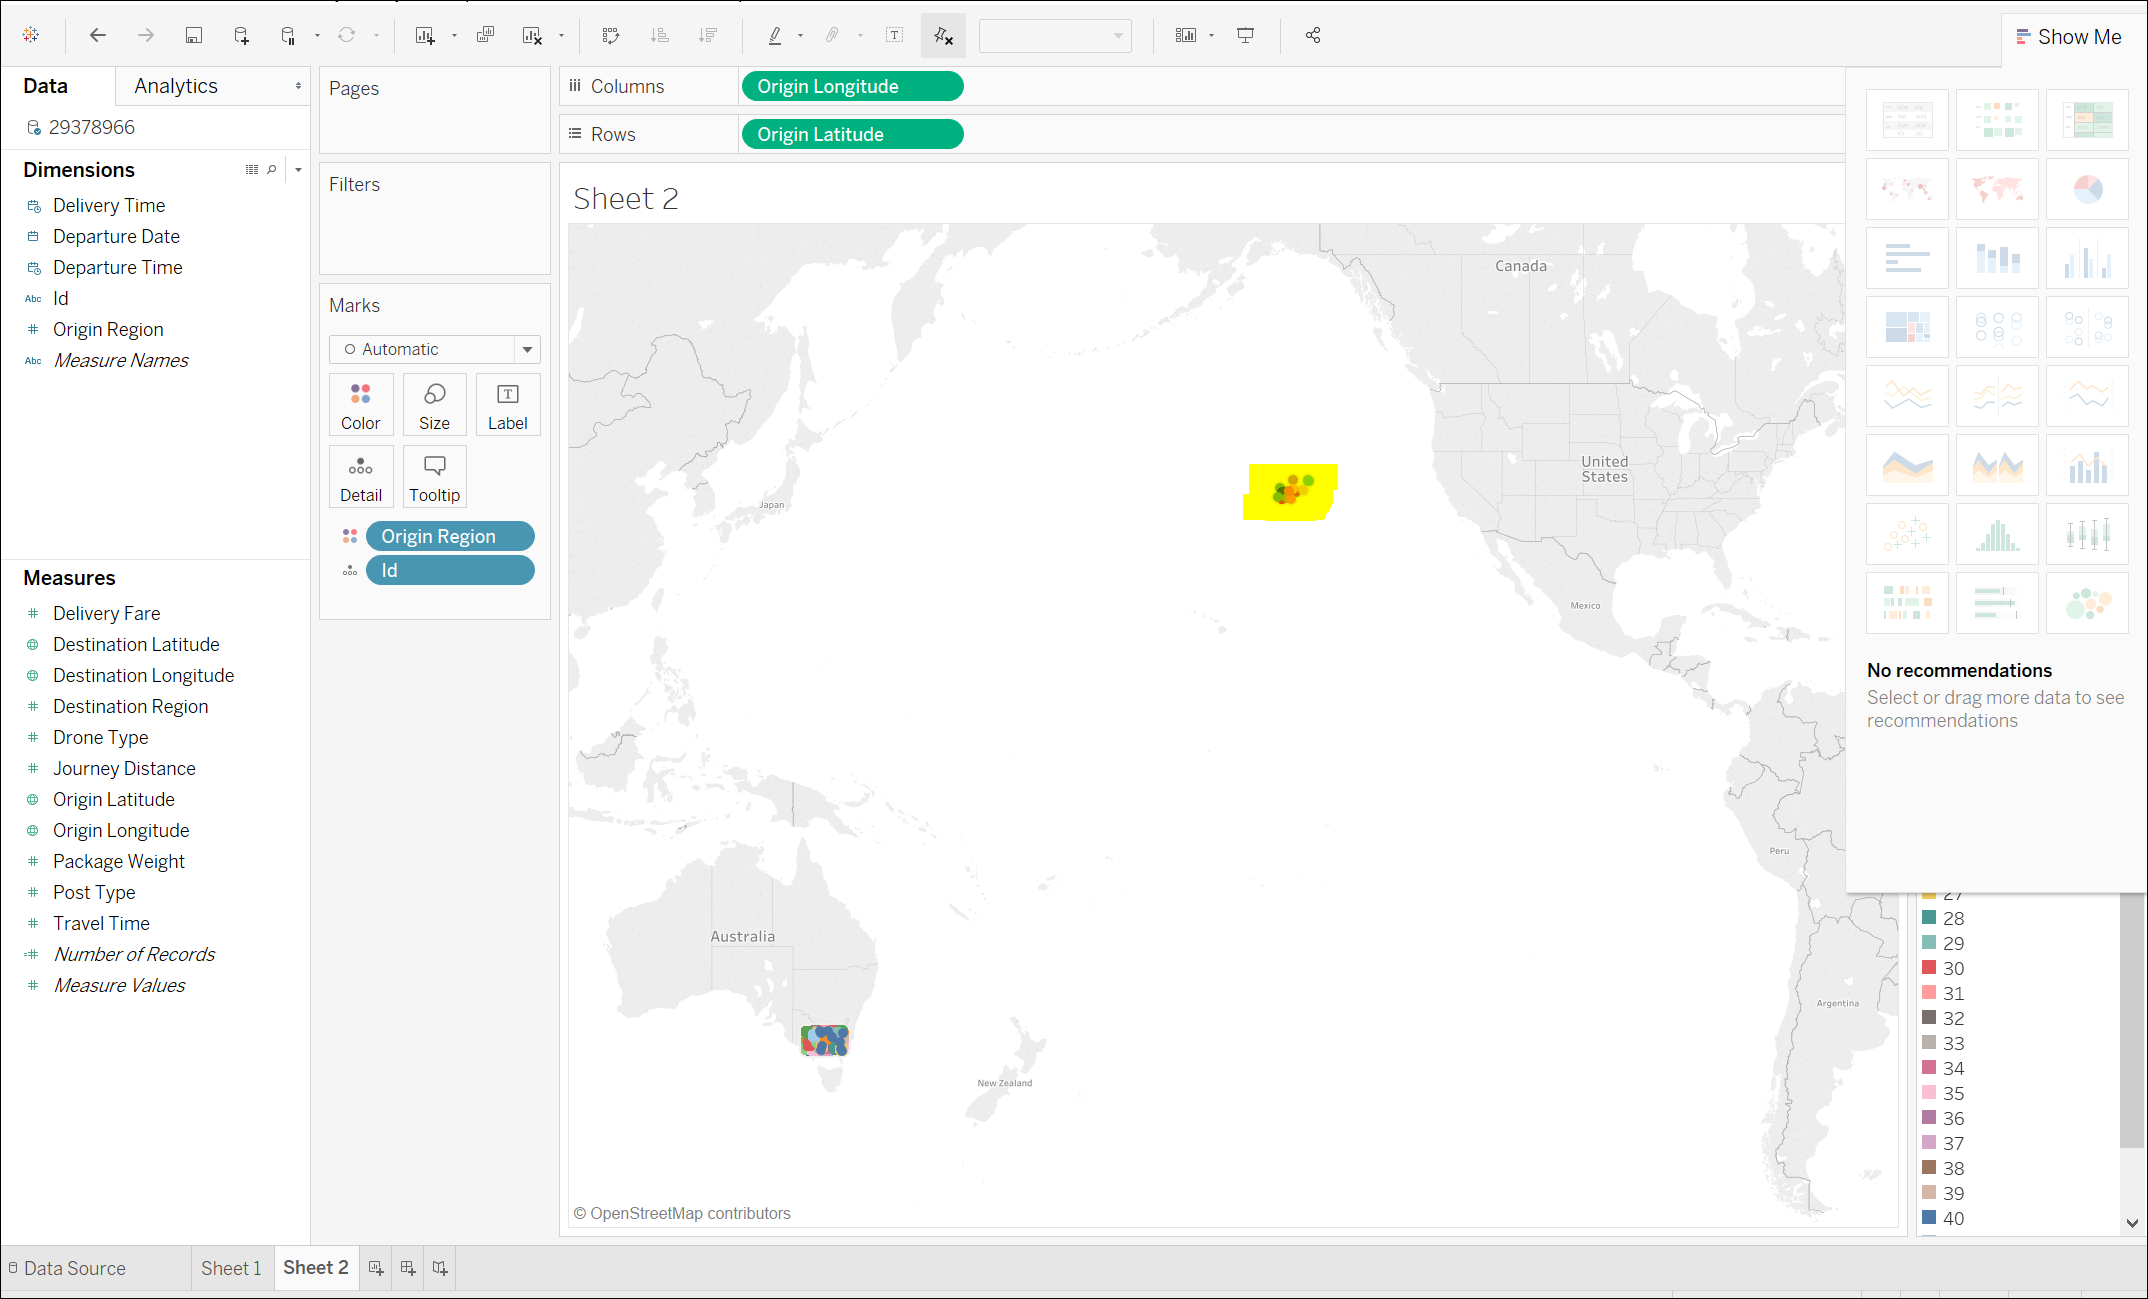

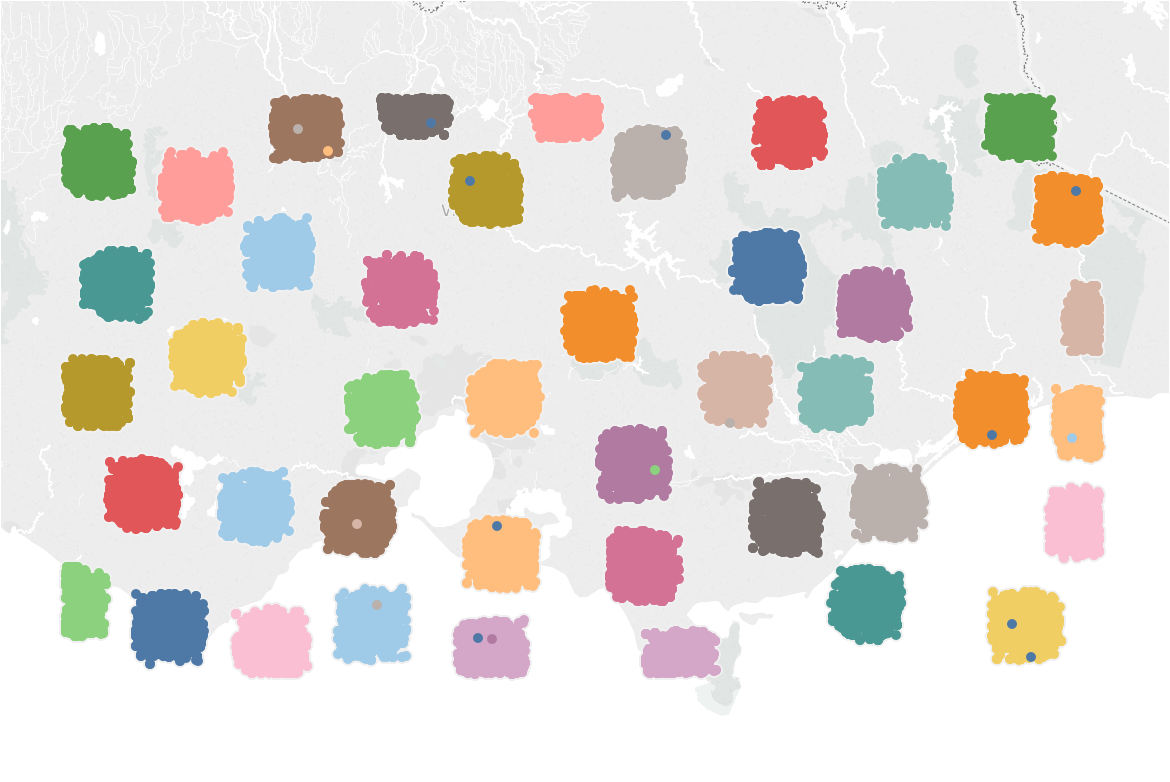

In [25]:
ori_lat = df["Origin Latitude"].abs() # Since all latitude values for Victoria region would be negative we are first converting them into all positive values

In [26]:
df["Origin_Latitude_Fixed"] = -ori_lat # Changing all latitude coordinates into negative values for Origin region

In [27]:
df["Origin_Longitude_Fixed"] = df["Origin Longitude"].abs() # ALl destination values for Victoria region would be positive

In [28]:
dest_lat = df["Destination Latitude"].abs()

In [29]:
df["Destination_Latitude_Fixed"] = -dest_lat # Changing all latitude coordinates into negative values for Destination region

In [30]:
df["Destination_Longitude_Fixed"] = df["Destination Longitude"].abs() # Creating new column for fixed values

In [31]:
df.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,...,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Post_Type_Fixed,Origin_Latitude_Fixed,Origin_Longitude_Fixed,Destination_Latitude_Fixed,Destination_Longitude_Fixed
0,ID1539639018,1.0,0.0,22.996,6.0,3.0,-37.010450,145.157215,-38.462943,145.120010,...,2018-03-26,19:42:31,168.47,22:30:59,110.53,0.0,-37.010450,145.157215,-38.462943,145.120010
1,ID1385010917,1.0,0.0,38.172,29.0,33.0,-37.838834,147.101792,-38.169420,147.358541,...,2018-07-03,08:09:46,49.89,8:59:39,79.23,0.0,-37.838834,147.101792,-38.169420,147.358541
2,ID1158751745,NaN,0.0,18.571,42.0,20.0,-36.899481,148.206792,-37.202341,146.699904,...,2018-05-07,10:09:53,122.20,12:12:05,122.13,0.0,-36.899481,148.206792,-37.202341,146.699904
3,ID1662403986,1.0,0.0,39.964,24.0,6.0,-36.712433,148.143052,-36.858307,145.026652,...,2018-07-07,04:09:37,285.05,8:54:40,134.60,0.0,-36.712433,148.143052,-36.858307,145.026652
4,ID1212596617,2.0,0.0,12.160,34.0,7.0,-37.245267,144.705454,-38.781576,148.176714,...,2018-06-22,00:49:48,298.11,5:47:54,179.70,0.0,-37.245267,144.705454,-38.781576,148.176714


### calculating journey distance

In [32]:
def journey_dist(row): # Using the haversine formula to calculate distance between two points
    R = 6378.0

    ori_lat = radians(row["Origin_Latitude_Fixed"])
    ori_long = radians(row["Origin_Longitude_Fixed"])
    dest_lat = radians(row["Destination_Latitude_Fixed"])
    dest_long = radians(row["Destination_Longitude_Fixed"])

    dlon = dest_long - ori_long
    dlat = dest_lat - ori_lat

    a = sin(dlat / 2)**2 + cos(ori_lat) * cos(dest_lat) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    distance = round(distance, 3) # Rounding the result to 3 decimal places to match the value with given values
    return distance


In [33]:
df['Journey_Distance_calculated'] = df.apply(journey_dist, axis=1) # Applying the above created function to calculate distance between two points

In [34]:
journey = df.filter(items=['Journey Distance', 'Journey_Distance_calculated'])

In [35]:
print(journey)

       Journey Distance  Journey_Distance_calculated
0               161.721                      161.721
1                43.144                       43.144
2               138.053                      138.053
3               278.295                      278.295
4               349.148                      349.148
5               102.385                      102.385
6               403.270                      403.270
7               432.550                      432.550
8               197.021                      197.021
9               404.943                      404.943
10              161.467                      161.467
11              136.077                      136.077
12               93.200                       93.200
13              159.185                      159.185
14              252.209                      252.209
15              386.715                      386.715
16              132.459                      132.459
17              447.394                      4

In [36]:
def fix_distance(row):
    jour_dist = row["Journey Distance"]
    jour_dist_calc = row["Journey_Distance_calculated"]
    
    if jour_dist != jour_dist_calc: # Comparing dataset journey distance with calculated journey distance to match if it is corrent otherwise replace it with correct values
        jour_dist = jour_dist_calc
        return jour_dist
    else:
        return jour_dist

In [37]:
df["Journey_Distance_Fixed"] = df.apply(fix_distance, axis=1) # Applying above created function to fix the journey distance

In [38]:
df.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,...,Travel Time,Delivery Time,Delivery Fare,Post_Type_Fixed,Origin_Latitude_Fixed,Origin_Longitude_Fixed,Destination_Latitude_Fixed,Destination_Longitude_Fixed,Journey_Distance_calculated,Journey_Distance_Fixed
0,ID1539639018,1.0,0.0,22.996,6.0,3.0,-37.010450,145.157215,-38.462943,145.120010,...,168.47,22:30:59,110.53,0.0,-37.010450,145.157215,-38.462943,145.120010,161.721,161.721
1,ID1385010917,1.0,0.0,38.172,29.0,33.0,-37.838834,147.101792,-38.169420,147.358541,...,49.89,8:59:39,79.23,0.0,-37.838834,147.101792,-38.169420,147.358541,43.144,43.144
2,ID1158751745,NaN,0.0,18.571,42.0,20.0,-36.899481,148.206792,-37.202341,146.699904,...,122.20,12:12:05,122.13,0.0,-36.899481,148.206792,-37.202341,146.699904,138.053,138.053
3,ID1662403986,1.0,0.0,39.964,24.0,6.0,-36.712433,148.143052,-36.858307,145.026652,...,285.05,8:54:40,134.60,0.0,-36.712433,148.143052,-36.858307,145.026652,278.295,278.295
4,ID1212596617,2.0,0.0,12.160,34.0,7.0,-37.245267,144.705454,-38.781576,148.176714,...,298.11,5:47:54,179.70,0.0,-37.245267,144.705454,-38.781576,148.176714,349.148,349.148


### Fixing Region

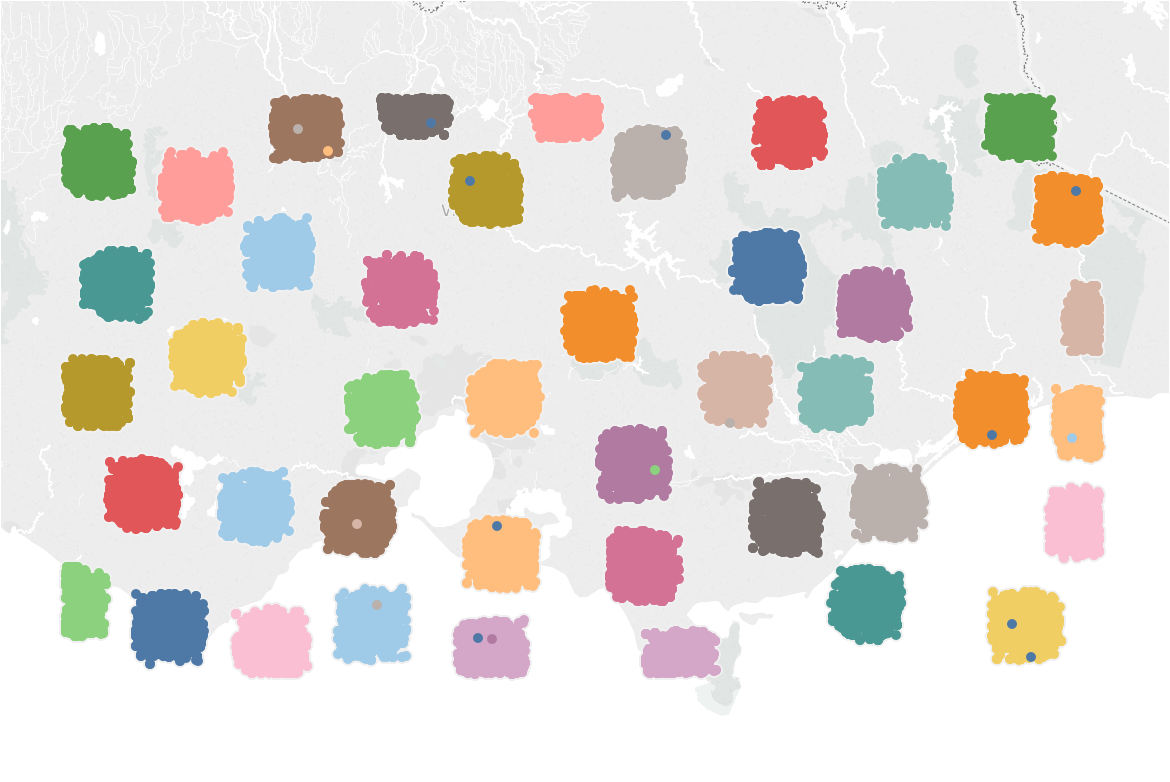

In [39]:
origins_r = df["Origin Region"].unique()

In [40]:
destinations_r = df["Destination Region"].unique()

In [41]:
print(sorted(origins_r))

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 38.0, 39.0, 42.0, nan, 36.0, 37.0, 40.0, 41.0, 43.0]


In [42]:
print(sorted(destinations_r))

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, nan]


In [43]:
df.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,...,Travel Time,Delivery Time,Delivery Fare,Post_Type_Fixed,Origin_Latitude_Fixed,Origin_Longitude_Fixed,Destination_Latitude_Fixed,Destination_Longitude_Fixed,Journey_Distance_calculated,Journey_Distance_Fixed
0,ID1539639018,1.0,0.0,22.996,6.0,3.0,-37.010450,145.157215,-38.462943,145.120010,...,168.47,22:30:59,110.53,0.0,-37.010450,145.157215,-38.462943,145.120010,161.721,161.721
1,ID1385010917,1.0,0.0,38.172,29.0,33.0,-37.838834,147.101792,-38.169420,147.358541,...,49.89,8:59:39,79.23,0.0,-37.838834,147.101792,-38.169420,147.358541,43.144,43.144
2,ID1158751745,NaN,0.0,18.571,42.0,20.0,-36.899481,148.206792,-37.202341,146.699904,...,122.20,12:12:05,122.13,0.0,-36.899481,148.206792,-37.202341,146.699904,138.053,138.053
3,ID1662403986,1.0,0.0,39.964,24.0,6.0,-36.712433,148.143052,-36.858307,145.026652,...,285.05,8:54:40,134.60,0.0,-36.712433,148.143052,-36.858307,145.026652,278.295,278.295
4,ID1212596617,2.0,0.0,12.160,34.0,7.0,-37.245267,144.705454,-38.781576,148.176714,...,298.11,5:47:54,179.70,0.0,-37.245267,144.705454,-38.781576,148.176714,349.148,349.148


origin long mean

In [44]:
mean_orilat = df.groupby("Origin Region")["Origin_Latitude_Fixed"].mean() # Getting mean of the latitude to calculate the centre point of the origin

In [45]:
print(type(mean_orilat))

<class 'pandas.core.series.Series'>


In [46]:
mean_orilat = mean_orilat.to_dict()

In [47]:
mean_orilat

{1.0: -37.20043266761688,
 2.0: -37.50715836110436,
 3.0: -38.487304034597145,
 4.0: -36.78667569239499,
 5.0: -37.869913196023425,
 6.0: -36.92613545284849,
 7.0: -38.79923532937791,
 8.0: -38.70473586938528,
 9.0: -36.93162829940409,
 10.0: -38.231365294431356,
 11.0: -36.587797570884625,
 12.0: -38.34392639110861,
 13.0: -36.792659664823525,
 14.0: -38.54792731570442,
 15.0: -38.87661807864648,
 16.0: -37.41321142908894,
 17.0: -38.92340900587567,
 18.0: -36.637366991796036,
 19.0: -37.473163019523184,
 20.0: -37.246403166778144,
 21.0: -38.29113155717678,
 22.0: -37.86804348314356,
 23.0: -37.817134622077965,
 24.0: -36.636600392053765,
 25.0: -38.70309329964915,
 26.0: -37.79755082389706,
 27.0: -37.6467303523242,
 28.0: -37.31762029665379,
 29.0: -37.807399522377594,
 30.0: -36.659668594470055,
 31.0: -36.89944983713942,
 32.0: -36.5769099100236,
 33.0: -38.27646372834738,
 34.0: -37.35007466202537,
 35.0: -38.35840865104173,
 36.0: -38.113696150114585,
 37.0: -38.901775244320724

In [48]:
mean_orilong = df.groupby("Origin Region")["Origin_Longitude_Fixed"].mean().to_dict() 
# Getting mean of the longitude to calculate the centre point of the origin

In [49]:
mean_destlong = df.groupby("Destination Region")["Destination_Longitude_Fixed"].mean().to_dict() 
# Getting mean of the longitude to calculate the centre point of the destination

In [50]:
mean_destlat = df.groupby("Destination Region")["Destination_Latitude_Fixed"].mean().to_dict() 
# Getting mean of the latitude to calculate the centre point of the destination

In [51]:
std_orilat = df.groupby("Origin Region")["Origin_Latitude_Fixed"].std().to_dict() 
# Getting standard deviation of the latitude to calculate the outlier and get the radius of the origin

In [52]:
std_orilong = df.groupby("Origin Region")["Origin_Longitude_Fixed"].std().to_dict()

In [53]:
std_destlat = df.groupby("Destination Region")["Destination_Latitude_Fixed"].std().to_dict()

In [54]:
std_destlong = df.groupby("Destination Region")["Destination_Longitude_Fixed"].std().to_dict()

In [55]:
from itertools import chain
from collections import defaultdict

In [56]:
combine_ori = [mean_orilat, mean_orilong] # Creating a dictionary for the centre of the each origin region as a key value pair
origin_centre_mean = defaultdict(list)

for k, v in ((k, v) for d in combine_ori for k, v in d.items()):
    origin_centre_mean[k].append(v)

In [57]:
for k, v in origin_centre_mean.items():
    print(v)

[-37.20043266761688, 143.94766043169918]
[-37.50715836110436, 145.70836571361983]
[-38.487304034597145, 145.16175251575805]
[-36.78667569239499, 142.95678358444957]
[-37.869913196023425, 144.50956298736838]
[-36.92613545284849, 145.08168119127274]
[-38.79923532937791, 148.05033470771897]
[-38.70473586938528, 147.1768559126478]
[-36.93162829940409, 147.44051682383807]
[-38.231365294431356, 143.20275312357802]
[-36.587797570884625, 145.52762946931676]
[-38.34392639110861, 146.72664794087763]
[-36.792659664823525, 145.97067929952948]
[-38.54792731570442, 145.9424197175523]
[-38.87661807864648, 143.91899637281227]
[-37.41321142908894, 147.20331663238204]
[-38.92340900587567, 146.13670082327664]
[-36.637366991796036, 144.09894294135256]
[-37.473163019523184, 148.36510923212253]
[-37.246403166778144, 146.62678386833903]
[-38.29113155717678, 143.8144614093714]
[-37.86804348314356, 147.8483582831435]
[-37.817134622077965, 145.18009618028336]
[-36.636600392053765, 148.01360886185827]
[-38.70309

In [58]:
combine_dest = [mean_destlat, mean_destlong] # Creating a dictionary for the centre of the each destination region as a key value pair
destination_centre_mean = defaultdict(list)

for k, v in ((k, v) for d in combine_dest for k, v in d.items()):
    destination_centre_mean[k].append(v)

In [59]:
combine_ori_std = [std_orilat, std_orilong] # Creating a dictionary for the std of the each origin region as a key value pair
origin_centre_std = defaultdict(list)

for k, v in ((k, v) for d in combine_ori_std for k, v in d.items()):
    origin_centre_std[k].append(v)

In [60]:
combine_dest_std = [std_destlat, std_orilong] # Creating a dictionary for the std of the each origin region as a key value pair
destination_centre_std = defaultdict(list)

for k, v in ((k, v) for d in combine_ori_std for k, v in d.items()):
    destination_centre_std[k].append(v)

In [61]:
destination_centre_mean

defaultdict(list,
            {1.0: [-37.197507014302346, 143.944556539535],
             2.0: [-37.50546076768453, 145.6998763828246],
             3.0: [-38.4919500237079, 145.1598926121347],
             4.0: [-36.78559025482714, 142.95850332812878],
             5.0: [-37.86878094426615, 144.50922660458727],
             6.0: [-36.92984716035496, 145.0903519938463],
             7.0: [-38.80428331603326, 148.04272724275526],
             8.0: [-38.702570600114505, 147.17368432302402],
             9.0: [-36.92939191760724, 147.44124072347654],
             10.0: [-38.22778913029614, 143.1984479261958],
             11.0: [-36.58889573435299, 145.5263517743526],
             12.0: [-38.339977481595156, 146.73326622490794],
             13.0: [-36.78748105875634, 145.96909753147236],
             14.0: [-38.548873620487846, 145.9476938920733],
             15.0: [-38.87735032604046, 143.90790203055886],
             16.0: [-37.413672380113624, 147.20456536318173],
             17.0: 

In [62]:
origin_all = [mean_orilat, mean_orilong, std_orilat, std_orilong] # Creating a dictionary for the centre and std of the each origin region as a key value pair
origin_dict = defaultdict(list)

for k, v in ((k, v) for d in origin_all for k, v in d.items()):
    origin_dict[k].append(v)

In [63]:
destination_all = [mean_destlat, mean_destlong, std_destlat, std_destlong] # Creating a dictionary for the centre and std of the each destination region as a key value pair
destination_dict = defaultdict(list)

for k, v in ((k, v) for d in destination_all for k, v in d.items()):
    destination_dict[k].append(v)

Calculating lower bound and upper bound

In [64]:
origin_ub_lb ={} # Calculating the distance of the furthest point from the centre for each origin region to determine the outlier
for key, value in origin_dict.items(): # Below calculation will determine which points are outside of 3 standard deviation
    #print(value[0])
    origin_lat_ub = value[0] + 3 * value[2]
    origin_lat_lb = value[0] - 3 * value[2]
    origin_long_ub = value[1] + 3 * value[3]
    origin_long_lb = value[1] - 3 * value[3]
#     print(key)
#     print(origin_lat_ub)
#     print(origin_long_lb)
    origin_ub_lb[key] = [origin_lat_ub, origin_lat_lb, origin_long_ub, origin_long_lb]
print(origin_ub_lb)

{1.0: [-36.96452504088377, -37.43634029434999, 144.22213889221865, 143.6731819711797], 2.0: [-37.28199328517439, -37.73232343703433, 146.01499866377873, 145.40173276346093], 3.0: [-38.19829252936631, -38.776315539827976, 145.479771881866, 144.84373314965012], 4.0: [-36.53990069431039, -37.03345069047958, 143.3693690076494, 142.54419816124974], 5.0: [-37.636756295649086, -38.103070096397765, 144.7837259369296, 144.23540003780715], 6.0: [-36.69417643191213, -37.15809447378485, 145.36747066052675, 144.79589172201872], 7.0: [-38.56808106297521, -39.030389595780605, 148.33118560112294, 147.769483814315], 8.0: [-38.472845969847874, -38.93662576892269, 147.44736372897486, 146.90634809632073], 9.0: [-36.72162131642683, -37.14163528238135, 147.7348375926187, 147.14619605505743], 10.0: [-37.99809071171786, -38.464639877144855, 143.49113233254116, 142.91437391461488], 11.0: [-36.43546102074366, -36.74013412102559, 145.80372396152492, 145.2515349771086], 12.0: [-38.10885452683077, -38.578998255386

In [65]:
destination_ub_lb ={} # Calculating the distance of the furthest point from the centre for each destination region to determine the outlier
for key, value in destination_dict.items(): # Below calculation will determine which points are outside of 3 standard deviation
    #print(value[0])
    destination_lat_ub = value[0] + 3 * value[2]
    destination_lat_lb = value[0] - 3 * value[2]
    destination_long_ub = value[1] + 3 * value[3]
    destination_long_lb = value[1] - 3 * value[3]
#     print(key)
#     print(origin_lat_ub)
#     print(origin_long_lb)
    destination_ub_lb[key] = [destination_lat_ub, destination_lat_lb, destination_long_ub, destination_long_lb]
print(destination_ub_lb)

{1.0: [-36.95530391577883, -37.439710112825864, 144.21934631372068, 143.66976676534932], 2.0: [-37.27530443968273, -37.73561709568634, 146.01036619629636, 145.38938656935287], 3.0: [-38.27045540500879, -38.71344464240701, 145.46156064665183, 144.8582245776176], 4.0: [-36.55013239733829, -37.021048112315995, 143.2458165895228, 142.67119006673477], 5.0: [-37.62342153600503, -38.114140352527265, 144.81538822839408, 144.20306498078045], 6.0: [-36.70545505677036, -37.15423926393956, 145.38274202963728, 144.7979619580553], 7.0: [-38.57227425523181, -39.036292376834716, 148.33301537690608, 147.75243910860445], 8.0: [-38.47477723769445, -38.930363962534564, 147.44755892057583, 146.8998097254722], 9.0: [-36.71936985608253, -37.13941397913195, 147.7337649223047, 147.1487165246484], 10.0: [-37.99089729966545, -38.46468096092683, 143.48506887183945, 142.91182698055215], 11.0: [-36.43794617973487, -36.739845288971104, 145.80443370196247, 145.24826984674274], 12.0: [-38.10410925558873, -38.575845707

### Now we are checking for lat long outliers for each region

In [66]:
df.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,...,Travel Time,Delivery Time,Delivery Fare,Post_Type_Fixed,Origin_Latitude_Fixed,Origin_Longitude_Fixed,Destination_Latitude_Fixed,Destination_Longitude_Fixed,Journey_Distance_calculated,Journey_Distance_Fixed
0,ID1539639018,1.0,0.0,22.996,6.0,3.0,-37.010450,145.157215,-38.462943,145.120010,...,168.47,22:30:59,110.53,0.0,-37.010450,145.157215,-38.462943,145.120010,161.721,161.721
1,ID1385010917,1.0,0.0,38.172,29.0,33.0,-37.838834,147.101792,-38.169420,147.358541,...,49.89,8:59:39,79.23,0.0,-37.838834,147.101792,-38.169420,147.358541,43.144,43.144
2,ID1158751745,NaN,0.0,18.571,42.0,20.0,-36.899481,148.206792,-37.202341,146.699904,...,122.20,12:12:05,122.13,0.0,-36.899481,148.206792,-37.202341,146.699904,138.053,138.053
3,ID1662403986,1.0,0.0,39.964,24.0,6.0,-36.712433,148.143052,-36.858307,145.026652,...,285.05,8:54:40,134.60,0.0,-36.712433,148.143052,-36.858307,145.026652,278.295,278.295
4,ID1212596617,2.0,0.0,12.160,34.0,7.0,-37.245267,144.705454,-38.781576,148.176714,...,298.11,5:47:54,179.70,0.0,-37.245267,144.705454,-38.781576,148.176714,349.148,349.148


In [67]:
def dist_calc(cen_lat, cen_long, pt_lat, pt_long): # Using Haversine formula to calculate distance of each point
    R = 6378.0
    pt_lat = radians(pt_lat)
    pt_long = radians(pt_long)
    cen_lat = radians(cen_lat)
    cen_long = radians(cen_long)
    
    dlong = pt_long - cen_long
    dlat = pt_lat - cen_lat

    a = sin(dlat / 2)**2 + cos(pt_lat) * cos(cen_lat) * sin(dlong / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    distance = round(distance, 3)
    return distance 

In [68]:
def check_ori_outlier(lat, long): # This function will calculate distance of each point from each centre for each origin region to determine which centre is the closest to the point
    ori_reg = {}
    or_list = list(origin_ub_lb.keys())
    for region in or_list:
        value = origin_centre_mean[region]
        ori_reg[region] = dist_calc(lat, long, value[0], value[1]) # Creating a dictionary of distance of the point from each origion region centre
    region_val = min(ori_reg.items(), key=lambda x: x[1]) # This will determine which origin region centre is the closest to the point
    return region_val[0] # Returning the origin region number for the point and fix it if it is incorrect

In [69]:
df["ori_region_fixed"] = df.apply(lambda x:check_ori_outlier(x['Origin_Latitude_Fixed'],x['Origin_Longitude_Fixed']), axis=1)

In [70]:
df[df['Origin Region'] != df['ori_region_fixed']] # Below were the entries that were corrected for origin region

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,...,Delivery Time,Delivery Fare,Post_Type_Fixed,Origin_Latitude_Fixed,Origin_Longitude_Fixed,Destination_Latitude_Fixed,Destination_Longitude_Fixed,Journey_Distance_calculated,Journey_Distance_Fixed,ori_region_fixed
21,ID1488534748,3.0,0.0,25.026,NaN,42.0,-36.871662,144.990145,-36.940482,148.185419,...,0:01:42,196.65,0.0,-36.871662,144.990145,-36.940482,148.185419,284.506,284.506,6.0
2325,ID5758231325,2.0,1.0,26.345,32.0,8.0,-36.672389,144.258965,-38.669288,147.233591,...,20:32:32,203.29,1.0,-36.672389,144.258965,-38.669288,147.233591,343.632,343.632,18.0
4379,ID1521214807,1.0,0.0,6.131,22.0,24.0,-36.576374,144.054335,-36.741960,148.125911,...,6:44:44,142.96,0.0,-36.576374,144.054335,-36.741960,148.125911,364.026,364.026,18.0
6149,ID1118573588,1.0,0.0,19.977,NaN,28.0,-36.618478,144.777860,-37.265426,143.016424,...,0:53:24,129.12,0.0,-36.618478,144.777860,-37.265426,143.016424,172.465,172.465,32.0
6170,ID1649605735,1.0,0.0,18.708,NaN,11.0,-38.793588,147.971818,-36.660066,145.415614,...,21:28:45,123.50,0.0,-38.793588,147.971818,-36.660066,145.415614,327.166,327.166,7.0
8217,ID1690781790,3.0,0.0,18.669,NaN,14.0,-36.671245,146.067622,-38.594634,146.053864,...,8:14:58,212.43,0.0,-36.671245,146.067622,-38.594634,146.053864,214.110,214.110,13.0
8461,ID1656635762,1.0,0.0,41.952,19.0,38.0,-38.366875,144.369849,-38.395799,144.520323,...,22:43:27,119.50,0.0,-38.366875,144.369849,-38.395799,144.520323,13.520,13.520,38.0
10238,ID1402267261,3.0,0.0,23.144,33.0,34.0,-38.728386,147.124134,-37.277377,144.765834,...,22:11:12,196.38,0.0,-38.728386,147.124134,-37.277377,144.765834,262.434,262.434,8.0
10262,ID5800563849,1.0,1.0,23.801,NaN,20.0,-36.915429,148.322493,-37.225119,146.554946,...,15:45:08,147.75,1.0,-36.915429,148.322493,-37.225119,146.554946,160.731,160.731,42.0
10513,ID5771401945,1.0,1.0,26.225,16.0,31.0,-38.857864,145.114102,-36.782418,143.555316,...,3:34:17,171.78,1.0,-38.857864,145.114102,-36.782418,143.555316,268.622,268.622,37.0


In [71]:
def check_dest_outlier(lat, long): # This function will calculate distance of each point from each centre for each destination region to determine which centre is the closest to the point
    dest_reg = {}
    dest_list = list(destination_ub_lb.keys())
    for region in dest_list:
        value = destination_centre_mean[region]
        dest_reg[region] = dist_calc(lat, long, value[0], value[1]) # Creating a dictionary of distance of the point from each destination region centre
    region_val = min(dest_reg.items(), key=lambda x: x[1]) # This will determine which destination region centre is the closest to the point
    return region_val[0] # Returning the destination region number for the point and fix it if it is incorrect

In [72]:
df["dest_region_fixed"] = df.apply(lambda x:check_dest_outlier(x['Destination_Latitude_Fixed'],x['Destination_Longitude_Fixed']), axis=1)

In [73]:
df[df['Destination Region'] != df['dest_region_fixed']] # Below were the entries that were corrected for destination region

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,...,Delivery Fare,Post_Type_Fixed,Origin_Latitude_Fixed,Origin_Longitude_Fixed,Destination_Latitude_Fixed,Destination_Longitude_Fixed,Journey_Distance_calculated,Journey_Distance_Fixed,ori_region_fixed,dest_region_fixed
3079,ID5902762568,1.0,1.0,40.293,8.0,21.0,-38.727144,147.318838,-36.630290,145.650308,...,171.41,1.0,-38.727144,147.318838,-36.630290,145.650308,275.835,275.835,8.0,11.0
4153,ID5600570326,2.0,1.0,5.757,6.0,NaN,-37.036415,145.122645,-37.773428,146.438754,...,176.96,1.0,-37.036415,145.122645,-37.773428,146.438754,142.387,142.387,6.0,39.0
4403,ID1376315255,3.0,0.0,29.355,32.0,30.0,-36.566409,144.837525,-38.664261,142.978899,...,196.56,0.0,-36.566409,144.837525,-38.664261,142.978899,285.280,285.280,32.0,25.0
8126,ID1651722968,1.0,0.0,18.807,12.0,40.0,-38.238715,146.806541,-38.414707,146.860329,...,96.90,0.0,-38.238715,146.806541,-38.414707,146.860329,20.146,20.146,12.0,12.0
12327,ID5834497674,1.0,1.0,32.181,18.0,NaN,-36.552607,144.102509,-38.785906,142.966262,...,173.15,1.0,-36.552607,144.102509,-38.785906,142.966262,268.000,268.000,18.0,25.0
12342,ID5405897669,1.0,1.0,39.690,7.0,NaN,-38.749086,148.070234,-37.872713,147.908038,...,117.05,1.0,-38.749086,148.070234,-37.872713,147.908038,98.579,98.579,7.0,22.0
12598,ID5569873191,2.0,1.0,7.775,8.0,35.0,-38.748695,147.004029,-37.293553,146.531937,...,201.85,1.0,-38.748695,147.004029,-37.293553,146.531937,167.188,167.188,8.0,20.0
12611,ID1741728045,1.0,0.0,47.252,4.0,39.0,-36.907659,143.109911,-38.769196,143.339607,...,515.70,0.0,-36.907659,143.109911,-38.769196,143.339607,208.202,208.202,4.0,40.0
14002,ID1884279953,1.0,0.0,26.263,37.0,NaN,-38.991353,144.950543,-37.403592,148.384831,...,137.89,0.0,-38.991353,144.950543,-37.403592,148.384831,348.534,348.534,37.0,19.0
14399,ID1872784399,3.0,0.0,14.000,35.0,35.0,-38.373007,148.227004,-37.415206,147.350691,...,185.07,0.0,-38.373007,148.227004,-37.415206,147.350691,131.504,131.504,35.0,16.0


### Fixing Departure Time

In [74]:
df['Departure Time'].head(10)

0    19:42:31
1    08:09:46
2    10:09:53
3    04:09:37
4    00:49:48
5    16:45:39
6    16:28:01
7    12:22:43
8    12:00:37
9    19:24:30
Name: Departure Time, dtype: object

In [75]:
df['departure_time'] = pd.to_timedelta(df['Departure Time']) 
# Converting time into timedelta to perform operations as well as to check the validity of the format

In [76]:
df['delivery_time'] = pd.to_timedelta(df['Delivery Time']) 
# Converting time into timedelta to perform operations as well as to check the validity of the format

In [77]:
df['Travel Time'].head(10)

0    168.47
1     49.89
2    122.20
3    285.05
4    298.11
5    109.13
6    410.02
7    335.67
8    203.77
9    411.69
Name: Travel Time, dtype: float64

In [78]:
df['Calculated_Travel_Time'] = (df['delivery_time'] - df['departure_time']).dt.seconds/60 
# Calculating travel time for each entry to compare with the provided and converting it into minutes

In [79]:
df['Calculated_Travel_Time'] = round(df['Calculated_Travel_Time'], 2)

In [80]:
df['Calculated_Travel_Time'].isnull().sum() 

0

In [81]:
df['Travel Time'].isnull().sum()

40

In [82]:
df[abs(df['Travel Time'] - df['Calculated_Travel_Time']) > 0.02].loc[:, ['Id','Drone Type', 'departure_time', 'delivery_time', 'Travel Time', 'Calculated_Travel_Time']].shape
# There are 60 entries where the time difference between provided travel time and calculated travel time is more than 0.02 precision.
# These are the entries that need to be corrected.

(60, 6)

In [83]:
# From the below observation we can see that there are 60 entries where the calculated time is not appearing correct.
# From looking at the data I am considering the hypothesis that since that the time is in 24 hour format I am hypothesising since calculated travel time does not look correct...
#...travel time might be correct. However, for travel time to be correct we might have to swap the departure time with delivery time...
#...and if this is the case then travel time in this instance will be correct and calculated travel time will not be.

In [84]:
df[abs(df['Travel Time'] - df['Calculated_Travel_Time']) > 0.02].loc[:, ['Id','Drone Type', 'departure_time', 'delivery_time', 'Travel Time', 'Calculated_Travel_Time']]

,Id,Drone Type,departure_time,delivery_time,Travel Time,Calculated_Travel_Time
765,ID1888559616,3.0,01:01:50,23:20:52,100.97,1339.03
781,ID5313482231,1.0,17:17:45,15:21:28,116.30,1323.72
832,ID5880610734,1.0,22:18:33,20:05:31,133.04,1306.97
1835,ID1481021990,1.0,15:44:13,14:26:13,78.01,1362.00
2530,ID5244966228,3.0,16:50:59,20:52:30,65.67,241.52
2548,ID1579828527,1.0,05:15:36,09:54:46,72.50,279.17
2842,ID1688208209,1.0,21:56:25,20:14:53,101.54,1338.47
2848,ID5325178986,1.0,21:45:10,16:54:14,290.94,1149.07
2854,ID1369219186,1.0,18:51:24,12:24:52,386.54,1053.47
3492,ID5345766752,1.0,14:02:56,16:58:56,369.33,176.00


In [85]:
swapdf = df[abs(df['Calculated_Travel_Time'] - df['Travel Time']) > 0.02]

In [86]:
swapdf.shape

(60, 28)

In [87]:
swapdf['Calculated_Travel_Time'] = round((swapdf['departure_time'] - swapdf['delivery_time']).dt.seconds/60,2)
swapdf

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,...,Origin_Longitude_Fixed,Destination_Latitude_Fixed,Destination_Longitude_Fixed,Journey_Distance_calculated,Journey_Distance_Fixed,ori_region_fixed,dest_region_fixed,departure_time,delivery_time,Calculated_Travel_Time
765,ID1888559616,3.0,0.0,8.828,10.0,5.0,-38.215190,143.160978,-37.858945,144.495408,...,143.160978,-37.858945,144.495408,123.532,123.532,10.0,5.0,01:01:50,23:20:52,100.97
781,ID5313482231,1.0,1.0,30.954,19.0,35.0,-37.454241,148.374414,-38.431707,148.229531,...,148.374414,-38.431707,148.229531,109.549,109.549,19.0,35.0,17:17:45,15:21:28,116.28
832,ID5880610734,1.0,1.0,30.412,6.0,1.0,-36.974958,145.160409,-37.322831,143.805620,...,145.160409,-37.322831,143.805620,126.289,126.289,6.0,1.0,22:18:33,20:05:31,133.03
1835,ID1481021990,1.0,0.0,31.459,41.0,21.0,-38.882875,144.430283,-38.356043,143.964876,...,144.430283,-38.356043,143.964876,71.258,71.258,41.0,21.0,15:44:13,14:26:13,78.00
2530,ID5244966228,3.0,1.0,25.866,25.0,10.0,-38.716080,142.899775,-38.115799,143.339508,...,142.899775,-38.115799,143.339508,77.046,77.046,25.0,10.0,16:50:59,20:52:30,1198.48
2548,ID1579828527,1.0,0.0,9.012,14.0,3.0,-38.482450,145.768286,-38.572882,145.022121,...,145.768286,-38.572882,145.022121,65.754,65.754,14.0,3.0,05:15:36,09:54:46,1160.83
2842,ID1688208209,1.0,0.0,19.817,6.0,5.0,-37.027881,145.024350,-37.733405,144.424254,...,145.024350,-37.733405,144.424254,94.792,94.792,6.0,5.0,21:56:25,20:14:53,101.53
2848,ID5325178986,1.0,1.0,38.955,19.0,23.0,-37.519632,148.403638,-37.754223,145.193233,...,148.403638,-37.754223,145.193233,284.190,284.190,19.0,23.0,21:45:10,16:54:14,290.93
2854,ID1369219186,1.0,0.0,36.731,4.0,29.0,-36.656905,143.001521,-37.827815,147.027474,...,143.001521,-37.827815,147.027474,379.793,379.793,4.0,29.0,18:51:24,12:24:52,386.53
3492,ID5345766752,1.0,1.0,35.368,8.0,25.0,-38.570532,147.138063,-38.799487,142.975307,...,147.138063,-38.799487,142.975307,362.581,362.581,8.0,25.0,14:02:56,16:58:56,1264.00


In [88]:
swapdf = swapdf[abs(swapdf['Calculated_Travel_Time'] - swapdf['Travel Time']) < 0.02].loc[:,['Id','Drone Type', 'departure_time', 'delivery_time', 'Travel Time', 'Calculated_Travel_Time'] ]
# Creating a swap dataframe to test our hypothesis

In [89]:
swapdf.shape

(40, 6)

In [90]:
swaplist = swapdf.index.tolist()

In [91]:
for ind in swaplist:
    (df.loc[ind, ['departure_time', 'delivery_time']]) = (df.loc[ind, ['delivery_time', 'departure_time']]).values
    # Swapping the values of departure time with delivery time to see if our hypothesis would turn out to be true

In [92]:
df['Calculated_Travel_Time'] = round((df['delivery_time'] - df['departure_time']).dt.seconds/60,2)
# Calculating travel time again to see if our hypothesis was correct

In [93]:
df[abs(df['Travel Time'] - df['Calculated_Travel_Time']) > 0.02].loc[:, ['Id','Drone Type', 'Departure Time', 'Delivery Time', 'Travel Time', 'Calculated_Travel_Time']].shape

(20, 6)

In [94]:
to_be_fixed_df = df[abs(df['Travel Time'] - df['Calculated_Travel_Time']) > 0.02].loc[:, ['Id','Drone Type', 'Departure Time', 'Delivery Time', 'Travel Time', 'Calculated_Travel_Time']]
# Now below we can indeed see that swapping the departure time values with travel time values were indeed a correct move
# But there are 20 entries where we need to perform further operation to fix these entries

In [95]:
df.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,...,Origin_Longitude_Fixed,Destination_Latitude_Fixed,Destination_Longitude_Fixed,Journey_Distance_calculated,Journey_Distance_Fixed,ori_region_fixed,dest_region_fixed,departure_time,delivery_time,Calculated_Travel_Time
0,ID1539639018,1.0,0.0,22.996,6.0,3.0,-37.010450,145.157215,-38.462943,145.120010,...,145.157215,-38.462943,145.120010,161.721,161.721,6.0,3.0,19:42:31,22:30:59,168.47
1,ID1385010917,1.0,0.0,38.172,29.0,33.0,-37.838834,147.101792,-38.169420,147.358541,...,147.101792,-38.169420,147.358541,43.144,43.144,29.0,33.0,08:09:46,08:59:39,49.88
2,ID1158751745,NaN,0.0,18.571,42.0,20.0,-36.899481,148.206792,-37.202341,146.699904,...,148.206792,-37.202341,146.699904,138.053,138.053,42.0,20.0,10:09:53,12:12:05,122.20
3,ID1662403986,1.0,0.0,39.964,24.0,6.0,-36.712433,148.143052,-36.858307,145.026652,...,148.143052,-36.858307,145.026652,278.295,278.295,24.0,6.0,04:09:37,08:54:40,285.05
4,ID1212596617,2.0,0.0,12.160,34.0,7.0,-37.245267,144.705454,-38.781576,148.176714,...,144.705454,-38.781576,148.176714,349.148,349.148,34.0,7.0,00:49:48,05:47:54,298.10


In [96]:
df.loc[:,['Travel Time', 'Calculated_Travel_Time']]

,Travel Time,Calculated_Travel_Time
0,168.47,168.47
1,49.89,49.88
2,122.20,122.20
3,285.05,285.05
4,298.11,298.10
5,109.13,109.12
6,410.02,410.02
7,335.67,335.67
8,203.77,203.77
9,411.69,411.68


### Calculating and fixing Drone type and speed for each drone

As per the information provided in the assignment specification and the dataset there are three drone types and we know that each type of drone has three phases namely(takeOff, onRoute , and Landing ). The drone may have different speeds at different phases. takeOff and Landing phases only take five minutes. 

In [97]:
# We can use below formula to calculate the speed as per the given information:

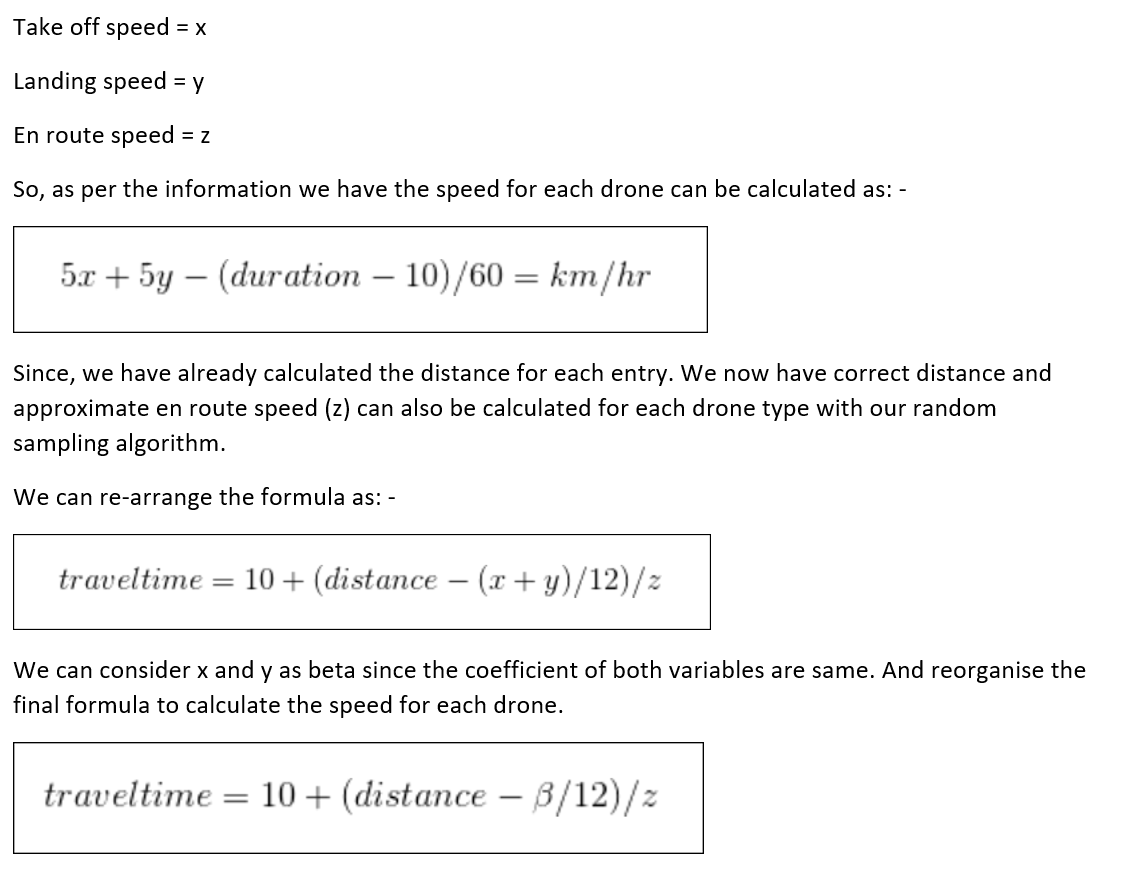

In [98]:
distdf = df[abs(df['Journey Distance'] - df['Journey_Distance_Fixed']) == 0]

In [99]:
distdf.loc[:, ['Journey Distance', 'Journey_Distance_Fixed']].head(10)

,Journey Distance,Journey_Distance_Fixed
0,161.721,161.721
1,43.144,43.144
2,138.053,138.053
3,278.295,278.295
4,349.148,349.148
5,102.385,102.385
6,403.270,403.270
7,432.550,432.550
8,197.021,197.021
10,161.467,161.467


In [100]:
distdf_2 = distdf[distdf['Calculated_Travel_Time'].notnull()]

In [101]:
distdf_2.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,...,Origin_Longitude_Fixed,Destination_Latitude_Fixed,Destination_Longitude_Fixed,Journey_Distance_calculated,Journey_Distance_Fixed,ori_region_fixed,dest_region_fixed,departure_time,delivery_time,Calculated_Travel_Time
0,ID1539639018,1.0,0.0,22.996,6.0,3.0,-37.010450,145.157215,-38.462943,145.120010,...,145.157215,-38.462943,145.120010,161.721,161.721,6.0,3.0,19:42:31,22:30:59,168.47
1,ID1385010917,1.0,0.0,38.172,29.0,33.0,-37.838834,147.101792,-38.169420,147.358541,...,147.101792,-38.169420,147.358541,43.144,43.144,29.0,33.0,08:09:46,08:59:39,49.88
2,ID1158751745,NaN,0.0,18.571,42.0,20.0,-36.899481,148.206792,-37.202341,146.699904,...,148.206792,-37.202341,146.699904,138.053,138.053,42.0,20.0,10:09:53,12:12:05,122.20
3,ID1662403986,1.0,0.0,39.964,24.0,6.0,-36.712433,148.143052,-36.858307,145.026652,...,148.143052,-36.858307,145.026652,278.295,278.295,24.0,6.0,04:09:37,08:54:40,285.05
4,ID1212596617,2.0,0.0,12.160,34.0,7.0,-37.245267,144.705454,-38.781576,148.176714,...,144.705454,-38.781576,148.176714,349.148,349.148,34.0,7.0,00:49:48,05:47:54,298.10


Creating test dataframe for each drone type to calculate speed for each drone type respectively

In [102]:
distdf = distdf_2[abs(distdf_2['Calculated_Travel_Time'] - distdf_2['Travel Time']) == 0] 

In [103]:
distdf.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,...,Origin_Longitude_Fixed,Destination_Latitude_Fixed,Destination_Longitude_Fixed,Journey_Distance_calculated,Journey_Distance_Fixed,ori_region_fixed,dest_region_fixed,departure_time,delivery_time,Calculated_Travel_Time
0,ID1539639018,1.0,0.0,22.996,6.0,3.0,-37.010450,145.157215,-38.462943,145.120010,...,145.157215,-38.462943,145.120010,161.721,161.721,6.0,3.0,19:42:31,22:30:59,168.47
2,ID1158751745,NaN,0.0,18.571,42.0,20.0,-36.899481,148.206792,-37.202341,146.699904,...,148.206792,-37.202341,146.699904,138.053,138.053,42.0,20.0,10:09:53,12:12:05,122.20
3,ID1662403986,1.0,0.0,39.964,24.0,6.0,-36.712433,148.143052,-36.858307,145.026652,...,148.143052,-36.858307,145.026652,278.295,278.295,24.0,6.0,04:09:37,08:54:40,285.05
6,ID1894665775,1.0,0.0,12.200,42.0,21.0,-37.060691,148.181353,-38.159609,143.823170,...,148.181353,-38.159609,143.823170,403.270,403.270,42.0,21.0,16:28:01,23:18:02,410.02
7,ID1745570924,3.0,0.0,21.375,35.0,40.0,-38.388066,148.182394,-38.929745,143.254212,...,148.182394,-38.929745,143.254212,432.550,432.550,35.0,40.0,12:22:43,17:58:23,335.67


In [104]:
# Creating a separate dataframe for each drone type for the entries where travel times are correct
droneone = distdf[distdf['Drone Type'] == 1.0]
dronetwo = distdf[distdf['Drone Type'] == 2.0]
dronethree = distdf[distdf['Drone Type'] == 3.0]

In [105]:
droneone.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,...,Origin_Longitude_Fixed,Destination_Latitude_Fixed,Destination_Longitude_Fixed,Journey_Distance_calculated,Journey_Distance_Fixed,ori_region_fixed,dest_region_fixed,departure_time,delivery_time,Calculated_Travel_Time
0,ID1539639018,1.0,0.0,22.996,6.0,3.0,-37.010450,145.157215,-38.462943,145.120010,...,145.157215,-38.462943,145.120010,161.721,161.721,6.0,3.0,19:42:31,22:30:59,168.47
3,ID1662403986,1.0,0.0,39.964,24.0,6.0,-36.712433,148.143052,-36.858307,145.026652,...,148.143052,-36.858307,145.026652,278.295,278.295,24.0,6.0,04:09:37,08:54:40,285.05
6,ID1894665775,1.0,0.0,12.200,42.0,21.0,-37.060691,148.181353,-38.159609,143.823170,...,148.181353,-38.159609,143.823170,403.270,403.270,42.0,21.0,16:28:01,23:18:02,410.02
8,ID1580404488,1.0,0.0,26.134,42.0,12.0,-36.946372,148.244582,-38.255096,146.740521,...,148.244582,-38.255096,146.740521,197.021,197.021,42.0,12.0,12:00:37,15:24:23,203.77
15,ID1279070651,1.0,0.0,19.362,22.0,40.0,-37.971770,147.727974,-38.728558,143.404076,...,147.727974,-38.728558,143.404076,386.715,386.715,22.0,40.0,14:22:39,20:56:07,393.47


In [106]:
from statistics import mean

beta = [] #(x+y)
zone = []
for i in range(5000): # Running a simulation to calculate speed
    d1 = droneone.sample(n=2, replace=False) # Taking two random samples for the drone type
    #print(d1)
    dist1 = d1.iloc[0,10]
    #print(dist1)
    time1 = d1.iloc[0,13]
    #print(time1)
    dist2 = d1.iloc[1,10]
    #print(dist2)
    time2 = d1.iloc[1,13]
    #print(time2)
    
    if (dist2 - dist1) != 0 and (time2 - time1) !=0:
        speedone = abs((dist2-dist1)/(time2-time1))
        zone.append(speedone)
        xy1 = dist1 - (time1-10)*speedone #to calculate the speed of takeoff
        xy2 = dist2 - (time2-10)*speedone #to calculate the speed of landing
        xy = (xy1+xy2)/2
        beta.append(xy)
#         print(beta)
#         print(zone)

print("En route speed for Drone type 1 is: ",  mean(zone)) 
print("Take-off and landing speed for drone type 1 is: ", mean(beta))    
df['zone1'] = mean(zone)
df['beta1'] = mean(beta)

En route speed for Drone type 1 is:  1.0024173808779744
Take-off and landing speed for drone type 1 is:  3.005148509043759


In [107]:
beta = [] #(x+y)
ztwo = []
for i in range(5000): # Running a simulation to calculate speed
    d2 = dronetwo.sample(n=2, replace=False) # Taking two random samples for the drone type
    #print(d1)
    dist1 = d2.iloc[0,10]
    #print(dist1)
    time1 = d2.iloc[0,13]
    #print(time1)
    dist2 = d2.iloc[1,10]
    #print(dist2)
    time2 = d2.iloc[1,13]
    #print(time2)
    
    if (dist2 - dist1) != 0 and (time2 - time1) !=0:
        speedtwo = abs((dist2-dist1)/(time2-time1))
        ztwo.append(speedtwo)
        xy1 = dist1 - (time1-10)*speedtwo #to calculate the speed of takeoff
        xy2 = dist2 - (time2-10)*speedtwo #to calculate the speed of landing
        xy = (xy1+xy2)/2
        beta.append(xy)
#         print(beta)
#         print(ztwo)

print("En route speed for Drone type 2 is: ",  mean(ztwo)) 
print("Take-off and landing speed for drone type 2 is: ", mean(beta))  
df['zone2'] = mean(ztwo)
df['beta2'] = mean(beta)

En route speed for Drone type 2 is:  1.2040360605209495
Take-off and landing speed for drone type 2 is:  2.179158018258952


In [108]:
beta = [] #(x+y)
zthree = []
for i in range(5000): # Running a simulation to calculate speed
    d3 = dronethree.sample(n=2, replace=False) # Taking two random samples for the drone type
    #print(d1)
    dist1 = d3.iloc[0,10]
    #print(dist1)
    time1 = d3.iloc[0,13]
    #print(time1)
    dist2 = d3.iloc[1,10]
    #print(dist2)
    time2 = d3.iloc[1,13]
    #print(time2)
    
    if (dist2 - dist1) != 0 and (time2 - time1) !=0:
        speedthree = abs((dist2-dist1)/(time2-time1))
        zthree.append(speedthree)
        xy1 = dist1 - (time1-10)*speedthree #to calculate the speed of takeoff
        xy2 = dist2 - (time2-10)*speedthree #to calculate the speed of landing
        xy = (xy1+xy2)/2
        beta.append(xy)
#         print(beta)
#         print(zthree)

print("En route speed for Drone type 3 is: ",  mean(zthree)) 
print("Take-off and landing speed for drone type 3 is: ", mean(beta))  
df['zone3'] = mean(zthree)
df['beta3'] = mean(beta)

En route speed for Drone type 3 is:  1.3166824280819058
Take-off and landing speed for drone type 3 is:  3.753346570233433


Since, we have now calculated the approximate and not exact speed for each drone type we can now try to calculate the estimated drone type for the rows that might not be correct.

In [109]:
def estimate_time(distance, z, beta):
    time = (distance-beta)/z + 10 # Using the derived formula to get the speed for each drone type
    return round(time,2)
    

In [110]:
df['Estimated_Time_1'] = df.apply(lambda x: estimate_time(x['Journey_Distance_Fixed'], x['zone1'], x['beta1']), axis=1)
df['Estimated_Time_2'] = df.apply(lambda x: estimate_time(x['Journey_Distance_Fixed'], x['zone2'], x['beta2']), axis=1)
df['Estimated_Time_3'] = df.apply(lambda x: estimate_time(x['Journey_Distance_Fixed'], x['zone3'], x['beta3']), axis=1)

In [111]:
df.loc[:,['Drone Type','Travel Time', 'Calculated_Travel_Time', 'Estimated_Time_1', 'Estimated_Time_2', 'Estimated_Time_3']].head(20)

,Drone Type,Travel Time,Calculated_Travel_Time,Estimated_Time_1,Estimated_Time_2,Estimated_Time_3
0,1.0,168.47,168.47,168.33,142.51,129.97
1,1.0,49.89,49.88,50.04,44.02,39.92
2,NaN,122.20,122.20,144.72,122.85,112.00
3,1.0,285.05,285.05,284.63,239.33,218.51
4,2.0,298.11,298.10,355.31,298.17,272.32
5,1.0,109.13,109.12,109.14,93.22,84.91
6,1.0,410.02,410.02,409.30,343.12,313.43
7,3.0,335.67,335.67,438.51,367.44,335.66
8,1.0,203.77,203.77,203.55,171.82,156.78
9,1.0,411.69,411.68,410.97,344.51,314.70


In [112]:
# Below function will help us determine if the calculated time would match or be close to one of the estimated time for each drone type.
def fix_dronetype(time1, time2, time3, travel_time):
    diff1 = abs(travel_time-time1)
    diff2 = abs(travel_time-time2)
    diff3 = abs(travel_time-time3)
    if min(diff1, diff2, diff3) == diff1:
        return 1.0
    elif min(diff1, diff2, diff3) == diff2:
        return 2.0
    elif min(diff1, diff2, diff3) == diff3:
        return 3.0
            

In [113]:
df['Drone_Type_Fixed'] = df.apply(lambda x: fix_dronetype(x['Estimated_Time_1'], x['Estimated_Time_2'], x['Estimated_Time_3'], x['Calculated_Travel_Time']), axis=1)

In [114]:
df.loc[:,['Drone Type','Drone_Type_Fixed','Travel Time', 'Calculated_Travel_Time', 'Estimated_Time_1', 'Estimated_Time_2', 'Estimated_Time_3']].head(100)

,Drone Type,Drone_Type_Fixed,Travel Time,Calculated_Travel_Time,Estimated_Time_1,Estimated_Time_2,Estimated_Time_3
0,1.0,1.0,168.47,168.47,168.33,142.51,129.97
1,1.0,1.0,49.89,49.88,50.04,44.02,39.92
2,NaN,2.0,122.20,122.20,144.72,122.85,112.00
3,1.0,1.0,285.05,285.05,284.63,239.33,218.51
4,2.0,2.0,298.11,298.10,355.31,298.17,272.32
5,1.0,1.0,109.13,109.12,109.14,93.22,84.91
6,1.0,1.0,410.02,410.02,409.30,343.12,313.43
7,3.0,3.0,335.67,335.67,438.51,367.44,335.66
8,1.0,1.0,203.77,203.77,203.55,171.82,156.78
9,1.0,1.0,411.69,411.68,410.97,344.51,314.70


In [115]:
df['Drone_Type_Fixed'].isnull().sum()

0

In [116]:
indexes = to_be_fixed_df.index

In [117]:
travel_fix = df.iloc[indexes]

In [118]:
travel_fix.loc[:, ['Drone Type','Departure Time', 'Delivery Time', 'Journey Distance', 'Travel Time', 'Calculated_Travel_Time', 'Estimated_Time_1', 'Estimated_Time_2', 'Estimated_Time_3']]

,Drone Type,Departure Time,Delivery Time,Journey Distance,Travel Time,Calculated_Travel_Time,Estimated_Time_1,Estimated_Time_2,Estimated_Time_3
2530,3.0,16:50:59,20:52:30,77.046,65.67,241.52,83.86,72.18,65.66
2548,1.0,05:15:36,9:54:46,65.754,72.50,279.17,72.60,62.80,57.09
3492,1.0,14:02:56,16:58:56,362.581,369.33,176.00,368.71,309.33,282.52
7252,1.0,21:06:05,21:37:55,255.108,261.86,31.83,261.49,220.07,200.90
12029,3.0,23:29:30,0:01:58,222.221,175.93,32.47,228.69,192.75,175.92
14823,1.0,05:50:56,8:21:46,21.040,27.79,150.83,27.99,25.66,23.13
14833,3.0,03:48:59,8:14:54,243.907,192.40,265.92,250.32,210.76,192.39
16856,2.0,21:07:30,0:10:10,483.806,410.32,182.67,489.64,410.01,374.59
19195,2.0,00:06:08,5:00:27,113.984,102.14,294.32,120.71,102.86,93.72
20959,2.0,07:12:38,8:05:36,155.415,136.67,52.97,162.04,137.27,125.18


In [119]:
# Creating a function to perform operations on time. This will require converting time data type to timedelta type

from datetime import datetime, timedelta
def time_change(sec):
    time = timedelta(seconds=sec)
    d = datetime(1,1,1) + timedelta(sec)
    timer = str(d.hour) + ":" + str(d.minute) + ":" + str(d.second)
    return timer

for index in travel_fix.index:
    depsecs = pd.to_timedelta(df.loc[index, 'Departure Time']).seconds/60
    travsecs = df.loc[index, 'Travel Time']*60
    secs = depsecs + travsecs
    time = time_change(secs)
    df.loc[index, 'Delivery Time'] = time
    df.loc[index, 'Calculated_Travel_Time'] = df.loc[index, 'Travel Time']

In [120]:
df[abs(df['Travel Time'] - df['Calculated_Travel_Time']) > 0.02].loc[:, ['Id','Drone Type', 'departure_time', 'delivery_time', 'Travel Time', 'Calculated_Travel_Time', 'Estimated_Time_1','Estimated_Time_2','Estimated_Time_3','Drone_Type_Fixed']].head(5)

,Id,Drone Type,departure_time,delivery_time,Travel Time,Calculated_Travel_Time,Estimated_Time_1,Estimated_Time_2,Estimated_Time_3,Drone_Type_Fixed


In [121]:
df.isnull().sum()

Id                              0
Drone Type                     10
Post Type                      20
Package Weight                  0
Origin Region                  10
Destination Region             10
Origin Latitude                 0
Origin Longitude                0
Destination Latitude            0
Destination Longitude           0
Journey Distance                0
Departure Date                  0
Departure Time                  0
Travel Time                    40
Delivery Time                   0
Delivery Fare                  30
Post_Type_Fixed                 0
Origin_Latitude_Fixed           0
Origin_Longitude_Fixed          0
Destination_Latitude_Fixed      0
Destination_Longitude_Fixed     0
Journey_Distance_calculated     0
Journey_Distance_Fixed          0
ori_region_fixed                0
dest_region_fixed               0
departure_time                  0
delivery_time                   0
Calculated_Travel_Time          0
zone1                           0
beta1         

#### Swapping corrected entries with original then drop unnecessary columns

In [122]:
df['Drone Type'] = df['Drone_Type_Fixed']
df['Post Type'] = df['Post_Type_Fixed']
df['Origin Latitude'] = df['Origin_Latitude_Fixed']
df['Origin Longitude'] = df['Origin_Longitude_Fixed']
df['Destination Longitude'] = df['Destination_Longitude_Fixed']
df['Destination Latitude'] = df['Destination_Latitude_Fixed']
df['Journey Distance'] = df['Journey_Distance_Fixed']
df['Departure Time'] = df['departure_time']
df['Delivery Time'] = df['delivery_time']
df['Travel Time'] = df['Calculated_Travel_Time']
df['Origin Region'] = df['ori_region_fixed']
df['Destination Region'] = df['dest_region_fixed']

In [123]:
df = df.drop(columns=['Post_Type_Fixed','Origin_Latitude_Fixed','Destination_Longitude_Fixed', 'Journey_Distance_calculated','Journey_Distance_Fixed','ori_region_fixed','departure_time','delivery_time','Calculated_Travel_Time','zone1','beta1','beta2','zone3','beta3','Estimated_Time_1','Estimated_Time_2','Drone_Type_Fixed', 'zone2', 'Estimated_Time_3'
                     , 'Origin_Longitude_Fixed', 'Destination_Latitude_Fixed', 'dest_region_fixed'])

In [124]:
df.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
0,ID1539639018,1.0,0.0,22.996,6.0,3.0,-37.010450,145.157215,-38.462943,145.120010,161.721,2018-03-26,19:42:31,168.47,22:30:59,110.53
1,ID1385010917,1.0,0.0,38.172,29.0,33.0,-37.838834,147.101792,-38.169420,147.358541,43.144,2018-07-03,08:09:46,49.88,08:59:39,79.23
2,ID1158751745,2.0,0.0,18.571,42.0,20.0,-36.899481,148.206792,-37.202341,146.699904,138.053,2018-05-07,10:09:53,122.20,12:12:05,122.13
3,ID1662403986,1.0,0.0,39.964,24.0,6.0,-36.712433,148.143052,-36.858307,145.026652,278.295,2018-07-07,04:09:37,285.05,08:54:40,134.60
4,ID1212596617,2.0,0.0,12.160,34.0,7.0,-37.245267,144.705454,-38.781576,148.176714,349.148,2018-06-22,00:49:48,298.10,05:47:54,179.70


In [125]:
df.isnull().sum()

Id                        0
Drone Type                0
Post Type                 0
Package Weight            0
Origin Region             0
Destination Region        0
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance          0
Departure Date            0
Departure Time            0
Travel Time               0
Delivery Time             0
Delivery Fare            30
dtype: int64

In [126]:
corr = df.corr()

### This is where we are performing our EDA to see which columns or attributes are affecting the delivery price of our dataset.

In [127]:
#We will now use these attributes to determine, analyse and predict our delivery price as well as remove the outliers from the final file.

In [128]:
corr

,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Travel Time,Delivery Fare
Drone Type,1.000000,-0.000317,0.006902,0.007016,-0.000816,-0.004615,0.003542,0.001896,0.000154,-0.016525,-0.218686,0.473076
Post Type,-0.000317,1.000000,-0.005176,0.002167,-0.001616,-0.004455,-0.002230,-0.000994,-0.009571,-0.000134,0.000362,0.231429
Package Weight,0.006902,-0.005176,1.000000,0.007093,-0.008093,-0.001975,0.000551,0.007218,-0.001223,0.009103,0.008359,0.191964
Origin Region,0.007016,0.002167,0.007093,1.000000,-0.002999,-0.120811,0.088676,0.002728,0.000433,0.044557,0.040852,0.018142
Destination Region,-0.000816,-0.001616,-0.008093,-0.002999,1.000000,0.003238,-0.002927,-0.110807,0.080784,0.047870,0.047453,0.012823
Origin Latitude,-0.004615,-0.004455,-0.001975,-0.120811,0.003238,1.000000,0.039132,-0.000260,-0.001043,0.013690,0.015444,-0.007565
Origin Longitude,0.003542,-0.002230,0.000551,0.088676,-0.002927,0.039132,1.000000,-0.001539,0.003926,0.019254,0.018661,0.007356
Destination Latitude,0.001896,-0.000994,0.007218,0.002728,-0.110807,-0.000260,-0.001539,1.000000,0.048421,0.014438,0.013574,0.002260
Destination Longitude,0.000154,-0.009571,-0.001223,0.000433,0.080784,-0.001043,0.003926,0.048421,1.000000,0.012225,0.012027,0.001122
Journey Distance,-0.016525,-0.000134,0.009103,0.044557,0.047870,0.013690,0.019254,0.014438,0.012225,1.000000,0.972046,0.180963


In [129]:
import datetime
df['Departure Time'] = pd.to_timedelta(df['Departure Time']) 

In [130]:
df.loc[(datetime.timedelta(hours=6) <= df['Departure Time']) & (df['Departure Time']< datetime.timedelta(hours=12)),'Time of the day']=1

In [131]:
df.loc[(datetime.timedelta(hours=12) <= df['Departure Time']) & (df['Departure Time']< datetime.timedelta(hours=21)),'Time of the day']=2

In [132]:
df.loc[(datetime.timedelta(hours=21) <= df['Departure Time']) & (df['Departure Time']< datetime.timedelta(hours=24)),'Time of the day']=3

In [133]:
df.loc[(datetime.timedelta(hours=0) <= df['Departure Time']) & (df['Departure Time']< datetime.timedelta(hours=6)),'Time of the day']=3

In [134]:
df

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time of the day
0,ID1539639018,1.0,0.0,22.996,6.0,3.0,-37.010450,145.157215,-38.462943,145.120010,161.721,2018-03-26,19:42:31,168.47,22:30:59,110.53,2.0
1,ID1385010917,1.0,0.0,38.172,29.0,33.0,-37.838834,147.101792,-38.169420,147.358541,43.144,2018-07-03,08:09:46,49.88,08:59:39,79.23,1.0
2,ID1158751745,2.0,0.0,18.571,42.0,20.0,-36.899481,148.206792,-37.202341,146.699904,138.053,2018-05-07,10:09:53,122.20,12:12:05,122.13,1.0
3,ID1662403986,1.0,0.0,39.964,24.0,6.0,-36.712433,148.143052,-36.858307,145.026652,278.295,2018-07-07,04:09:37,285.05,08:54:40,134.60,3.0
4,ID1212596617,2.0,0.0,12.160,34.0,7.0,-37.245267,144.705454,-38.781576,148.176714,349.148,2018-06-22,00:49:48,298.10,05:47:54,179.70,3.0
5,ID5234321265,1.0,1.0,6.969,11.0,2.0,-36.654891,145.659318,-37.574642,145.663605,102.385,2018-01-13,16:45:39,109.12,18:34:46,133.53,2.0
6,ID1894665775,1.0,0.0,12.200,42.0,21.0,-37.060691,148.181353,-38.159609,143.823170,403.270,2018-07-10,16:28:01,410.02,23:18:02,125.90,2.0
7,ID1745570924,3.0,0.0,21.375,35.0,40.0,-38.388066,148.182394,-38.929745,143.254212,432.550,2018-06-19,12:22:43,335.67,17:58:23,214.66,2.0
8,ID1580404488,1.0,0.0,26.134,42.0,12.0,-36.946372,148.244582,-38.255096,146.740521,197.021,2018-05-20,12:00:37,203.77,15:24:23,114.65,2.0
9,ID5796738505,1.0,1.0,8.126,22.0,31.0,-37.790589,147.896109,-36.939379,143.445643,404.943,2018-02-01,19:24:30,411.68,02:16:11,167.65,2.0


In [135]:
pred_columns = ['Drone Type', 'Post Type', 'Package Weight', 'Journey Distance', 'Time of the day']

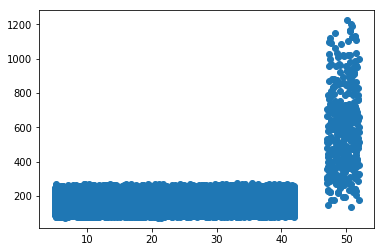

In [136]:
plt.scatter(df['Package Weight'], df['Delivery Fare'])

In [137]:
test_df = df[df['Package Weight'] < 45]
test_df = test_df.dropna()


In [138]:
lm = LinearRegression()

In [139]:
X_train, X_test, y_train, y_test = train_test_split(test_df.loc[:,pred_columns],test_df.loc[:,['Delivery Fare']], random_state = 1)

In [140]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [141]:
y_pred = lm.predict(X_test)

In [142]:
from sklearn.metrics import mean_squared_error

In [143]:
lm.score(X_test, y_test) # More the score close to 1 it is better

0.9867162123726645

In [144]:
mean_squared_error(y_pred, y_test)

19.809733675409536

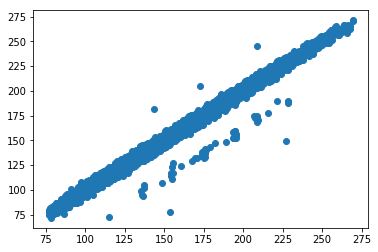

In [145]:
plt.scatter(y_pred, y_test)

In [146]:
test_df = test_df.dropna()

In [147]:
predictors = test_df.loc[:, pred_columns]

In [148]:
predictee = test_df['Delivery Fare']

In [149]:
fares = lm.predict(test_df.loc[:, pred_columns])

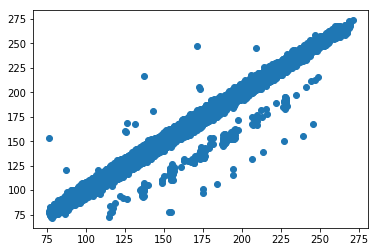

In [150]:
plt.scatter(fares, predictee)

In [151]:
se = round((fares - test_df.loc[:,['Delivery Fare']])**2,2)

In [152]:
se.columns = ['Squared Error']

In [153]:
se = se.sort_values('Squared Error', ascending=False)

In [154]:
outliers = se[se['Squared Error'] > 175].index.tolist()

In [155]:
len(outliers)

250

In [156]:
empty_fare = df[df['Delivery Fare'].isnull()]

In [157]:
empty_fare.shape

(30, 17)

In [158]:
test_df['Predicted Fare'] = fares

In [159]:
empty_fare['Delivery Fare'] = lm.predict(empty_fare.loc[:,pred_columns])
empty_fare['Delivery Fare'] = round(empty_fare['Delivery Fare'], 2)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [160]:
empty_index = empty_fare.index

In [161]:
for index in empty_index:
    df.loc[index,'Delivery Fare'] = empty_fare.loc[index,'Delivery Fare']

In [162]:
#Checking to see if there are any null values remaining in any of the cloumns

In [163]:
df.isnull().sum()

Id                       0
Drone Type               0
Post Type                0
Package Weight           0
Origin Region            0
Destination Region       0
Origin Latitude          0
Origin Longitude         0
Destination Latitude     0
Destination Longitude    0
Journey Distance         0
Departure Date           0
Departure Time           0
Travel Time              0
Delivery Time            0
Delivery Fare            0
Time of the day          0
dtype: int64

### Validating Data

In [164]:
# We can now validate the data to see if it ready to be exported.

In [165]:
df.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time of the day
0,ID1539639018,1.0,0.0,22.996,6.0,3.0,-37.010450,145.157215,-38.462943,145.120010,161.721,2018-03-26,19:42:31,168.47,22:30:59,110.53,2.0
1,ID1385010917,1.0,0.0,38.172,29.0,33.0,-37.838834,147.101792,-38.169420,147.358541,43.144,2018-07-03,08:09:46,49.88,08:59:39,79.23,1.0
2,ID1158751745,2.0,0.0,18.571,42.0,20.0,-36.899481,148.206792,-37.202341,146.699904,138.053,2018-05-07,10:09:53,122.20,12:12:05,122.13,1.0
3,ID1662403986,1.0,0.0,39.964,24.0,6.0,-36.712433,148.143052,-36.858307,145.026652,278.295,2018-07-07,04:09:37,285.05,08:54:40,134.60,3.0
4,ID1212596617,2.0,0.0,12.160,34.0,7.0,-37.245267,144.705454,-38.781576,148.176714,349.148,2018-06-22,00:49:48,298.10,05:47:54,179.70,3.0


In [166]:
# Check for duplicates

In [167]:
df.duplicated().sum()

0

In [168]:
# Check for post type. As per our hypothesis Ids starting with 1 should have post type 0 and Ids starting with 5 should have post type 1

In [169]:
df[df['Id'].str.startswith('ID1') & df['Post Type'] == 1.0]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time of the day


In [170]:
# Check for duplicated Id's

In [171]:
df.duplicated(subset='Id').sum()

0

In [172]:
# Check for Region

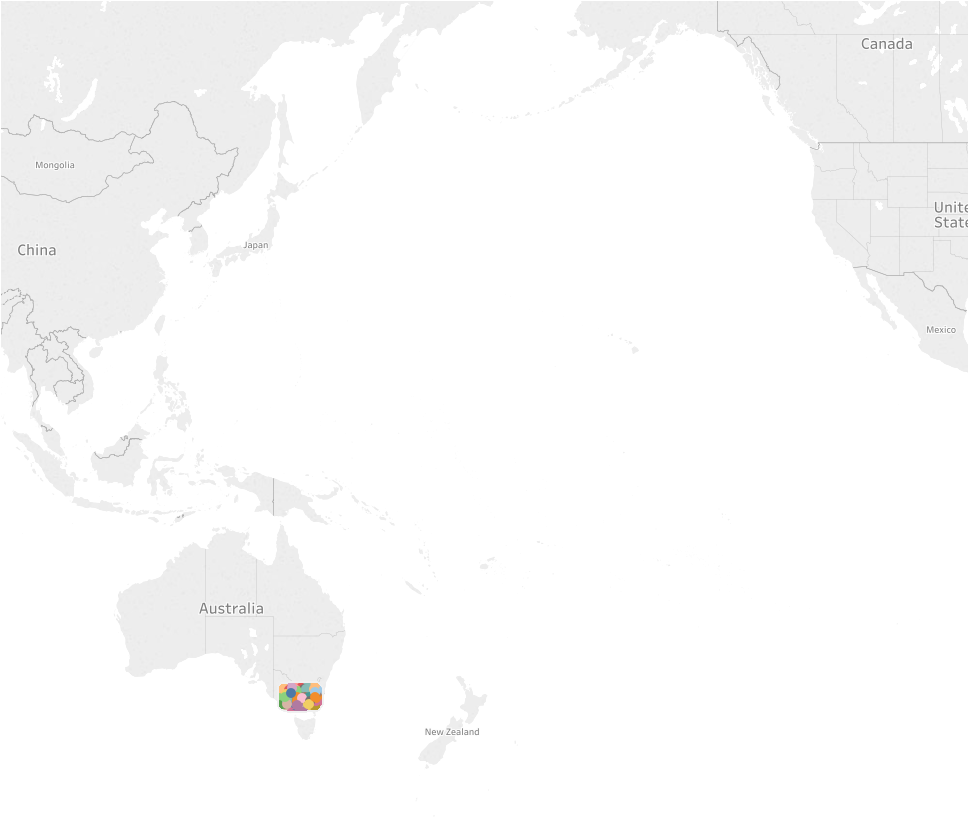

In [173]:
# Origin Region

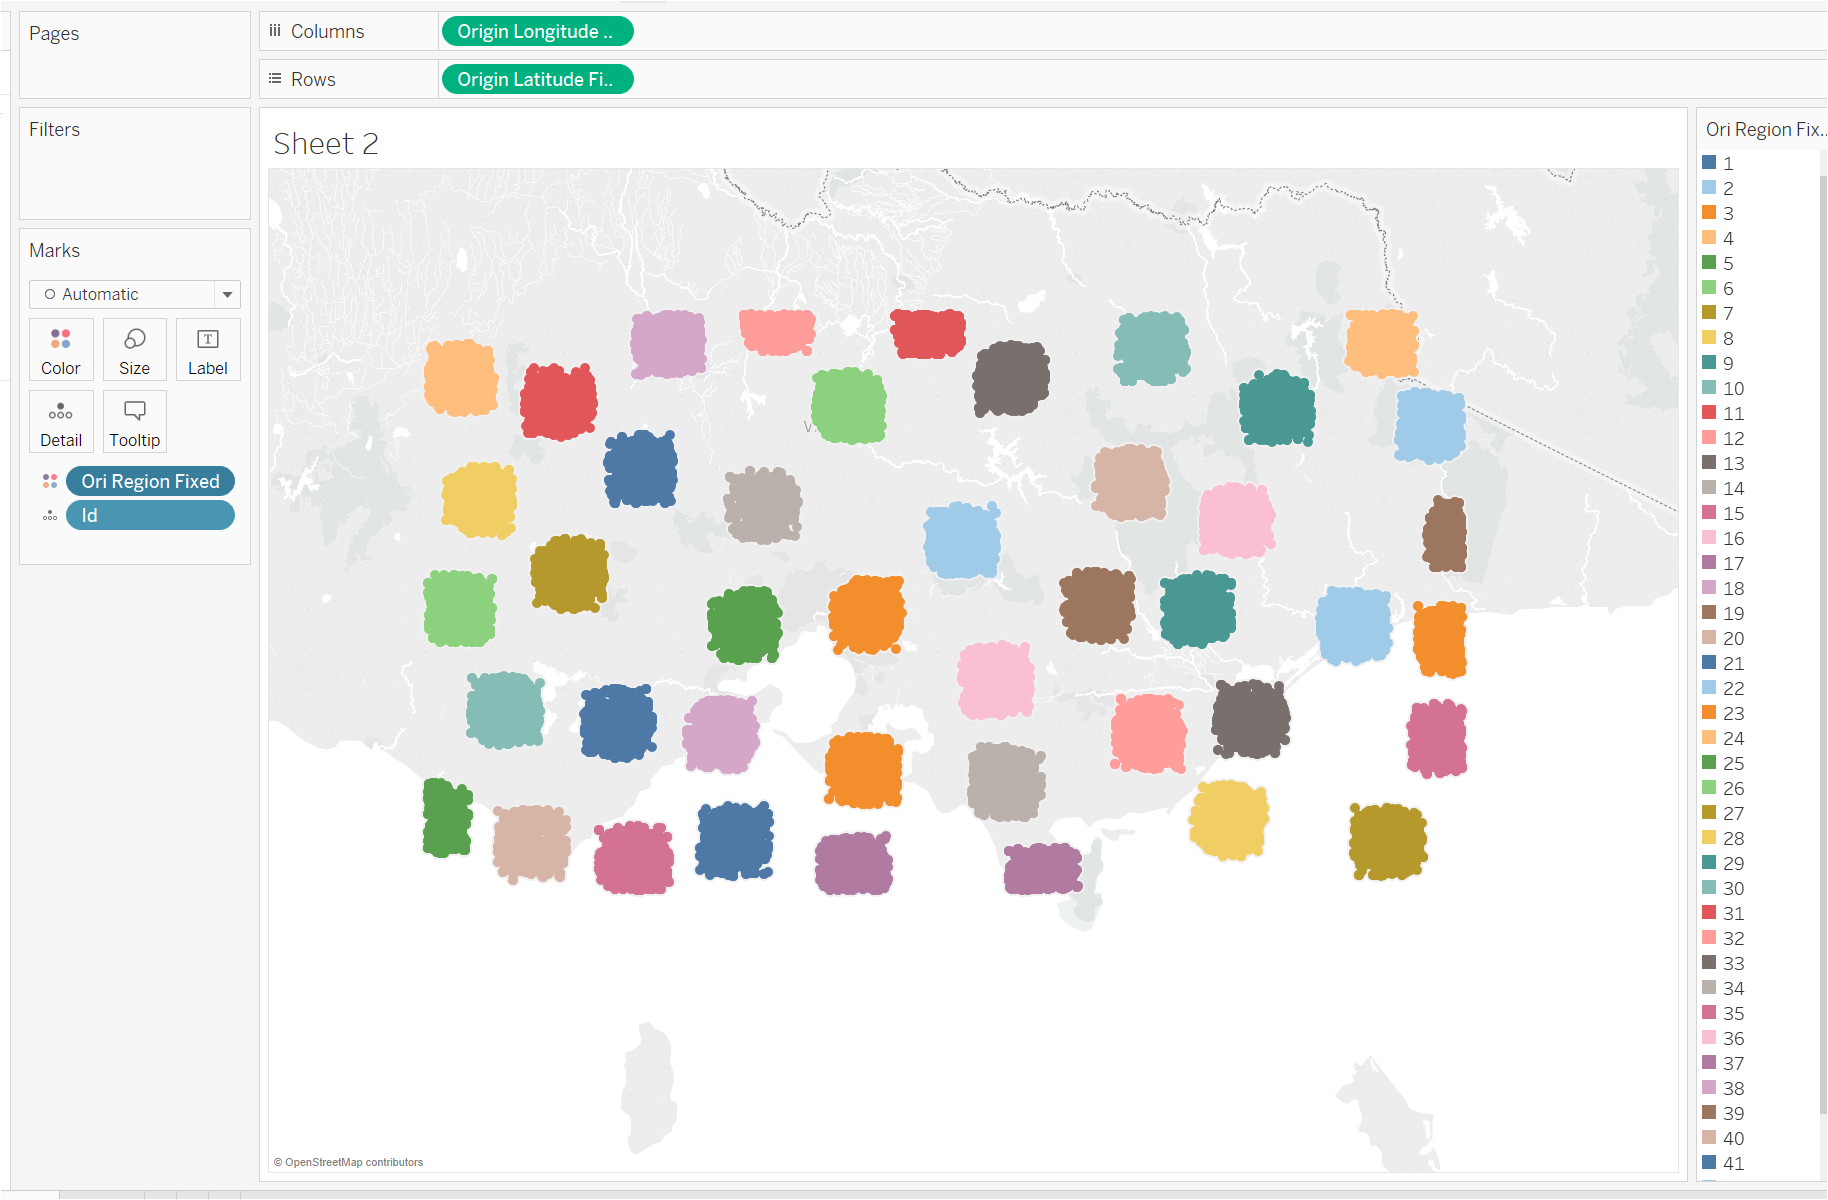

In [174]:
# Destination Region

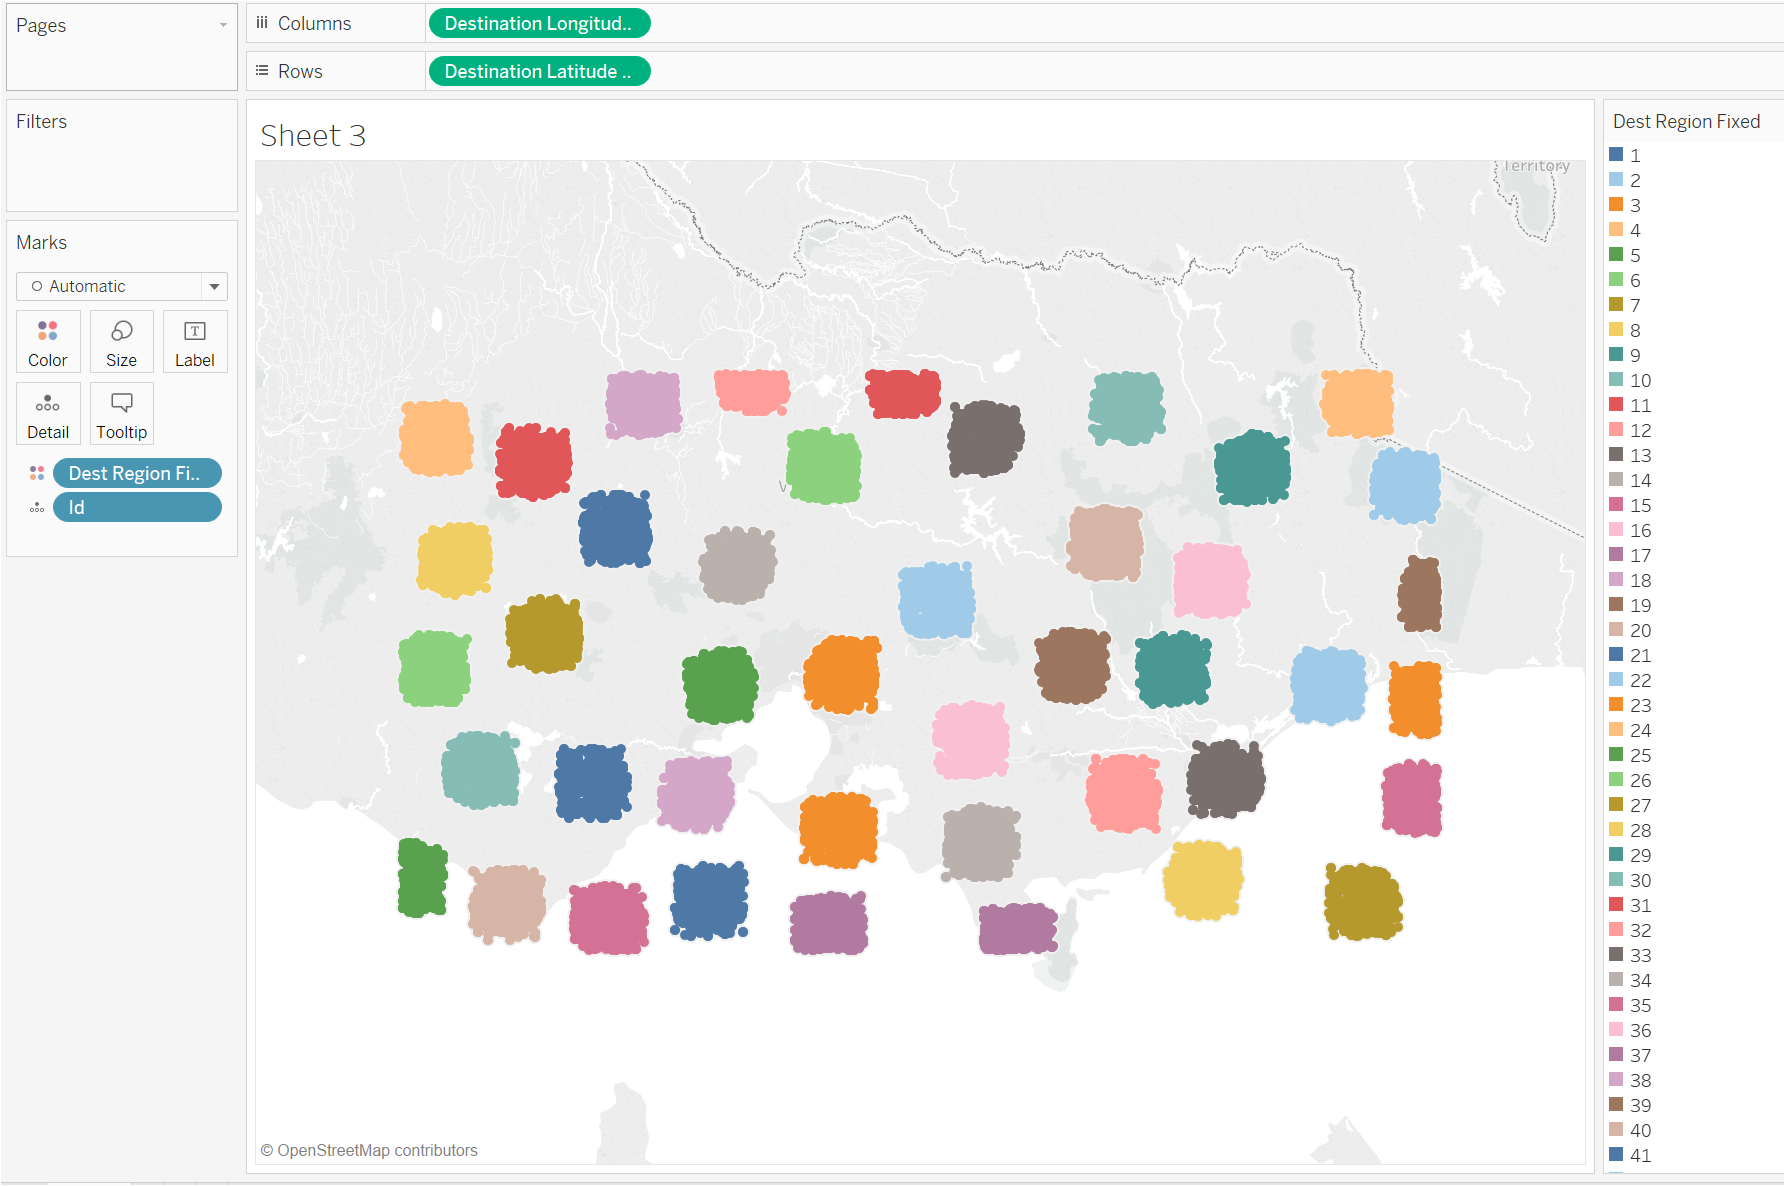

In [175]:
# As we can see there are no outliers and all longitude and latitude for Victoria region have been fixed.
# Note: - Used Tableau software to graph and plot the points 

## Relationship between Drone Type and Delivery Fare, Journey Distance
Confirming no Outliers

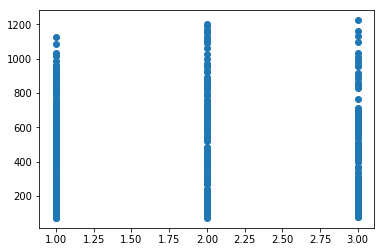

In [176]:
plt.scatter(df['Drone Type'], df['Delivery Fare'])

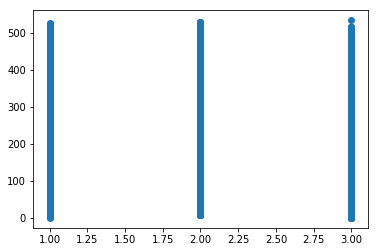

In [177]:
plt.scatter(df['Drone Type'], df['Journey Distance'])

### Dropping unnecessary columns

In [178]:
df.columns

Index(['Id', 'Drone Type', 'Post Type', 'Package Weight', 'Origin Region',
       'Destination Region', 'Origin Latitude', 'Origin Longitude',
       'Destination Latitude', 'Destination Longitude', 'Journey Distance',
       'Departure Date', 'Departure Time', 'Travel Time', 'Delivery Time',
       'Delivery Fare', 'Time of the day'],
      dtype='object')

In [179]:
df = df.drop(columns=['Time of the day'])

## Check integrity of the solution file

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36883 entries, 0 to 36882
Data columns (total 16 columns):
Id                       36883 non-null object
Drone Type               36883 non-null float64
Post Type                36883 non-null float64
Package Weight           36883 non-null float64
Origin Region            36883 non-null float64
Destination Region       36883 non-null float64
Origin Latitude          36883 non-null float64
Origin Longitude         36883 non-null float64
Destination Latitude     36883 non-null float64
Destination Longitude    36883 non-null float64
Journey Distance         36883 non-null float64
Departure Date           36883 non-null object
Departure Time           36883 non-null timedelta64[ns]
Travel Time              36883 non-null float64
Delivery Time            36883 non-null timedelta64[ns]
Delivery Fare            36883 non-null float64
dtypes: float64(12), object(2), timedelta64[ns](2)
memory usage: 6.0+ MB


dtypes of two columns don't match. Fixing them

In [181]:
# Changing the timedelta data type back to the float64 type to match with the original given file
from datetime import datetime, timedelta
def time_change(sec):
    time = timedelta(seconds=sec)
    d = datetime(1,1,1) + timedelta(sec)
    timer = str(d.hour) + ":" + str(d.minute) + ":" + str(d.second)
    return timer

In [186]:
import time
for index, row in df.iterrows():
    broken_deptime = row['Departure Time'].seconds
    timer = time.strftime('%H:%M:%S', time.gmtime(broken_deptime))
    df.loc[index, 'Departure Time'] = timer
    broken_deltime = row['Delivery Time'].seconds
    timel = time.strftime('%H:%M:%S', time.gmtime(broken_deltime))
    df.loc[index, 'Delivery Time'] = timel

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36883 entries, 0 to 36882
Data columns (total 16 columns):
Id                       36883 non-null object
Drone Type               36883 non-null float64
Post Type                36883 non-null float64
Package Weight           36883 non-null float64
Origin Region            36883 non-null float64
Destination Region       36883 non-null float64
Origin Latitude          36883 non-null float64
Origin Longitude         36883 non-null float64
Destination Latitude     36883 non-null float64
Destination Longitude    36883 non-null float64
Journey Distance         36883 non-null float64
Departure Date           36883 non-null object
Departure Time           36883 non-null object
Travel Time              36883 non-null float64
Delivery Time            36883 non-null object
Delivery Fare            36883 non-null float64
dtypes: float64(12), object(4)
memory usage: 6.0+ MB


In [189]:
df.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
0,ID1539639018,1.0,0.0,22.996,6.0,3.0,-37.010450,145.157215,-38.462943,145.120010,161.721,2018-03-26,19:42:31,168.47,22:30:59,110.53
1,ID1385010917,1.0,0.0,38.172,29.0,33.0,-37.838834,147.101792,-38.169420,147.358541,43.144,2018-07-03,08:09:46,49.88,08:59:39,79.23
2,ID1158751745,2.0,0.0,18.571,42.0,20.0,-36.899481,148.206792,-37.202341,146.699904,138.053,2018-05-07,10:09:53,122.20,12:12:05,122.13
3,ID1662403986,1.0,0.0,39.964,24.0,6.0,-36.712433,148.143052,-36.858307,145.026652,278.295,2018-07-07,04:09:37,285.05,08:54:40,134.60
4,ID1212596617,2.0,0.0,12.160,34.0,7.0,-37.245267,144.705454,-38.781576,148.176714,349.148,2018-06-22,00:49:48,298.10,05:47:54,179.70


In [190]:
# Exporting the solution file

In [191]:
df.to_csv('29378966_solution.csv', encoding='utf-8', index=False)

## Summary

- We first began with observing our dataset. Then noted down those observation.

- From the noted down observation we started to make our hypothesis and then tested the hypothesis to check if it was indeed correct.

- Once the hypothesis came true, we began to check the anomolies and outliers.

- Checked the anomolies and fixed them as required whereas excluded the outliers from our analysis as even though the outlier data was correct but it did not add any value to our analysis towards the correction of the data.

- Once the data was corrected we validated the corrected data.

- After the validation, we dropped unnecessary columns from out dataset

- Once we had required dataset, we exported the desired output file of the corrected data.

# References

- pandas.pydata.org. (2018). pandas.Series.str.startswith. [online] Available at: 
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.startswith.html [Accessed 26 Sep. 2018].


- stackoverflow.com. (2012). Getting distance between two point based on latitude/longitude. [online] Available at:
https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude [Accessed 26 Sep. 2018].


- stackoverflow.com. (2016). Merging two dictionaries while keeping the original. [online] Available at:
https://stackoverflow.com/questions/36180688/merging-two-dictionaries-while-keeping-the-original#36180760 [Accessed 26 Sep. 2018].


- pandas.pydata.org. (2017). pandas.to_timedelta. [online] Available at:
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_timedelta.html [Accessed 01 Oct. 2018].


- pandas.pydata.org (2018). pandas.DataFrame.sample. [online] Available at:
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html [Accessed 01 Oct. 2018].